In [1]:
#import dependecies

%matplotlib inline
from pathlib import Path
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#read Steam csv
game_df = pd.read_csv("../Group-6/games.csv")
game_df.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [3]:
#read columns
game_df.columns

Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='object')

In [4]:
#take mean of 'Estimated owners' and create new column 
vg_eo = game_df['Estimated owners'].apply(lambda x: (int(x.split(' - ')[0]) + int(x.split(' - ')[1]))/2)
game_df['Estimated Owners'] = vg_eo
game_df.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies,Estimated Owners
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,10000.0
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,10000.0
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,10000.0
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,10000.0
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,10000.0


In [5]:
#convert 'Release date' to datetime format
game_df['Release date'] = pd.to_datetime(game_df['Release date'])

# Extract the year, month, and day values into separate columns
game_df['year'] = game_df['Release date'].dt.year
game_df['month'] = game_df['Release date'].dt.month
game_df['day'] = game_df['Release date'].dt.day

#check datatypes and ensure 'Release date' values can be sorted
print(game_df.dtypes)
game_df.sort_values('Release date',inplace=True)
game_df.head(15)

AppID                                  int64
Name                                  object
Release date                  datetime64[ns]
Estimated owners                      object
Peak CCU                               int64
Required age                           int64
Price                                float64
DLC count                              int64
About the game                        object
Supported languages                   object
Full audio languages                  object
Reviews                               object
Header image                          object
Website                               object
Support url                           object
Support email                         object
Windows                                 bool
Mac                                     bool
Linux                                   bool
Metacritic score                       int64
Metacritic url                        object
User score                             int64
Positive  

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Publishers,Categories,Genres,Tags,Screenshots,Movies,Estimated Owners,year,month,day
36165,282010,Carmageddon Max Pack,1997-06-30,100000 - 200000,6,0,9.99,0,Carmageddon is the original freeform driving s...,['English'],...,THQ Nordic,"Single-player,Multi-player,Steam Trading Cards","Action,Indie,Racing","Combat Racing,Racing,Action,Classic,Indie,Gore...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,150000.0,1997,6,30
22217,232770,POSTAL,1997-11-14,5000000 - 10000000,30,18,0.00,0,Take control of The Postal Dude in his infamou...,['English'],...,Running With Scissors,"Single-player,Steam Achievements,Full controll...","Action,Indie","Horror,Twin Stick Shooter,Top-Down Shooter,Vil...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,7500000.0,1997,11,14
49557,70,Half-Life,1998-11-08,5000000 - 10000000,752,0,9.99,1,Named Game of the Year by over 50 publications...,"['English', 'French', 'German', 'Italian', 'Sp...",...,Valve,"Single-player,Multi-player,PvP,Online PvP,Stea...",Action,"FPS,Singleplayer,Sci-fi,Multiplayer,1990's,Act...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,7500000.0,1998,11,8
19555,20,Team Fortress Classic,1999-04-01,5000000 - 10000000,110,0,4.99,0,One of the most popular online action games of...,"['English', 'French', 'German', 'Italian', 'Sp...",...,Valve,"Multi-player,PvP,Online PvP,Shared/Split Scree...",Action,"Action,FPS,Multiplayer,Classic,Hero Shooter,Sh...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,7500000.0,1999,4,1
17218,224920,Legacy of Kain: Soul Reaver,1999-09-08,500000 - 1000000,4,17,0.00,0,"As Raziel, stalk the shadows of Nosgoth preyin...",['English'],...,Square Enix,Single-player,"Action,Adventure","Adventure,Action,Vampire,Classic,Story Rich,Da...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,750000.0,1999,9,8
39055,50,Half-Life: Opposing Force,1999-11-01,5000000 - 10000000,120,0,4.99,0,Return to the Black Mesa Research Facility as ...,"['English', 'French', 'German', 'Korean']",...,Valve,"Single-player,Multi-player,Valve Anti-Cheat en...",Action,"FPS,Action,Classic,Sci-fi,Singleplayer,Shooter...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,7500000.0,1999,11,1
34638,60,Ricochet,2000-11-01,5000000 - 10000000,10,0,4.99,0,A futuristic action game that challenges your ...,"['English', 'French', 'German', 'Italian', 'Sp...",...,Valve,"Multi-player,PvP,Online PvP,Valve Anti-Cheat e...",Action,"Action,FPS,Multiplayer,Classic,First-Person,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,7500000.0,2000,11,1
39428,10,Counter-Strike,2000-11-01,10000000 - 20000000,13230,0,9.99,0,Play the world's number 1 online action game. ...,"['English', 'French', 'German', 'Italian', 'Sp...",...,Valve,"Multi-player,PvP,Online PvP,Shared/Split Scree...",Action,"Action,FPS,Multiplayer,Shooter,Classic,Team-Ba...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,15000000.0,2000,11,1
33814,65540,Gothic 1,2001-03-15,500000 - 1000000,336,0,9.99,0,War has been waged across the kingdom of Myrta...,"['English', 'German', 'Spanish - Spain', 'Poli...",...,THQ Nordic,Single-player,"Action,RPG","RPG,Open World,Classic,Atmospheric,Singleplaye...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,750000.0,2001,3,15
50362,130,Half-Life: Blue Shift,2001-06-01,10000000 - 20000000,78,0,4.99,0,Made by Gearbox Software and originally releas...,"['English', 'French', 'German']",...,Valve,"Single-player,Remote Play Together",Action,"FPS,Action,Sci-fi,Singleplayer,Shooter,Aliens,...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,15000000.0,2001,6,1


In [6]:
#sort 'Metacritic score' values by descending order and remove any games that don't have a 'Metacritic score' (aka is equal to 0)
top_scores_df = game_df.sort_values(by="Metacritic score", ascending=False)
top_scores_df = top_scores_df[(top_scores_df["Metacritic score"])>0]
score_mean = top_scores_df["Metacritic score"].mean()

# Print the overal 'Metacritic score' mean and print the top mean scores per game
print('The mean of all Metacritic scores is: {}'.format(score_mean))
top_scores_df[["Name","Metacritic score","Positive","Average playtime forever","Estimated Owners"]].head()

The mean of all Metacritic scores is: 72.78705416116249


,Name,Metacritic score,Positive,Average playtime forever,Estimated Owners
64935,Persona 5 Royal,97,3588,381,350000.0
45752,Disco Elysium - The Final Cut,97,55250,979,1500000.0
49557,Half-Life,96,73346,459,7500000.0
57205,Grand Theft Auto V,96,1171197,13650,35000000.0
32406,BioShock™,96,26231,345,3500000.0


In [7]:
# find publishers by sum of their estimated owners
pub_df = game_df.groupby("Publishers")["Estimated Owners"].sum()

# find the mean of "Metacritic score" column for each publisher
mean_df = top_scores_df.groupby("Publishers")["Metacritic score"].mean()

# Create a new DataFrame with "Estimated Owners" and "Metacritic score mean" columns
pub_mean_df = pd.DataFrame({'Estimated Owners': pub_df, 'Metacritic score mean': mean_df})

# Sort the DataFrame by "Estimated Owners" column in descending order
pub_mean_df = pub_mean_df.sort_values(by="Estimated Owners", ascending=False)

# Print the top 15 rows of the updated DataFrame
print(pub_mean_df.head(15))

                         Estimated Owners  Metacritic score mean
Publishers                                                      
Valve                         629870000.0              85.391304
Ubisoft                       165790000.0              77.225000
Electronic Arts               143920000.0              80.469697
Amazon Games                  110000000.0              70.000000
Bethesda Softworks            107270000.0              78.813953
Xbox Game Studios             105675000.0              77.730769
SEGA                           83780000.0              77.346939
KRAFTON, Inc.                  76510000.0              65.000000
Square Enix                    71430000.0              75.555556
2K                             66675000.0              79.257143
Paradox Interactive            63945000.0              75.040816
Activision                     63685000.0              78.607143
Rockstar Games                 61005000.0              85.300000
Coffee Stain Publishing  

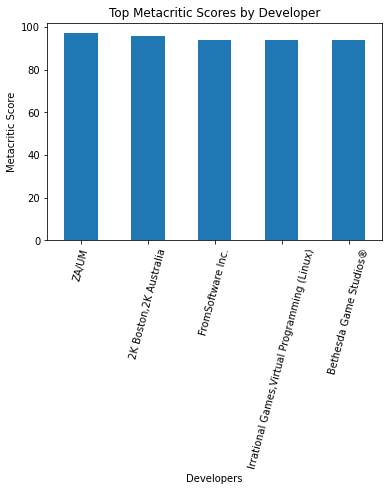

In [8]:
# find developers by sum of their estimated owners
dev_df = game_df.groupby("Developers")["Estimated Owners"].sum()

# find the mean of "Metacritic score" column for each developer
mean_df = top_scores_df.groupby("Developers")["Metacritic score"].mean().sort_values(ascending=False)

# Create a new DataFrame with "Estimated Owners" and "Metacritic score mean" columns
dev_mean_df = pd.DataFrame({'Estimated Owners': dev_df, 'Metacritic score mean': mean_df})

# Sort the DataFrame by "Estimated Owners" column in descending order
dev_mean_df = dev_mean_df.sort_values(by="Metacritic score mean", ascending=False)

# Print the top 15 rows of the updated DataFrame
#print(dev_mean_df.head(10))
top_df = mean_df.head(5)

top_graph = top_df.plot(kind="bar",x="Developers",y="Metacritic score mean")
plt.xticks(rotation=75)
plt.ylabel("Metacritic Score")
plt.title ("Top Metacritic Scores by Developer")
plt.show()

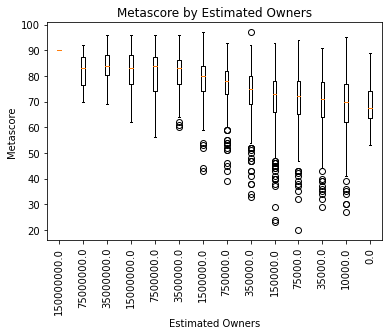

In [9]:
# Group top_scores_df by Estimated Owners
groups = top_scores_df.groupby("Estimated Owners")

# Sort groups by Estimated Owners from highest to lowest values
groups = sorted(groups, key=lambda x: x[0], reverse=True)

# Create a figure and axis object
fig, ax = plt.subplots()

# Iterate through groups and plot boxplots
for i, (name, group) in enumerate(groups):
    ax.boxplot(group["Metacritic score"], positions=[i+1])

# Add x-axis labels
plt.xticks(range(1, len(groups)+1), [name for name, group in groups], rotation=90)

# Add a title and y-axis label
plt.title('Metascore by Estimated Owners')
plt.ylabel('Metascore')
plt.xlabel('Estimated Owners')

# Show the plot
plt.show()

In [10]:
#find average'Metacritic score' by number of 'Estimated Owners' and order by 'Metacritic score'
owner_scores = top_scores_df.groupby("Estimated Owners")["Metacritic score"].mean().sort_values(ascending=False)
owner_scores

Estimated Owners
150000000.0    90.000000
35000000.0     83.500000
15000000.0     82.000000
75000000.0     81.666667
3500000.0      81.530612
7500000.0      80.634615
1500000.0      78.456446
750000.0       76.448819
350000.0       73.900156
150000.0       71.024014
75000.0        70.487280
35000.0        69.704981
0.0            68.642857
10000.0        68.519713
Name: Metacritic score, dtype: float64

In [11]:
#break out individual genres and join with top_scores_df
steam_genre_onehot_df = top_scores_df['Genres'].str.split(",").str.join('|').str.get_dummies()

In [12]:
top_genre_df = steam_genre_onehot_df.sum().sort_values(ascending=False)
top_genre_df.head(10)

Indie           2072
Action          1912
Adventure       1656
Strategy         926
RPG              804
Simulation       551
Casual           462
Racing           121
Sports           113
Free to Play      92
dtype: int64

In [13]:
#highest 'Metacritic score' by genre
big_genre_df = steam_genre_onehot_df.join(top_scores_df)
genre_scores = big_genre_df.groupby("Genres")["Metacritic score"].mean().sort_values(ascending=False)
genre_scores.head(10)

Genres
Action,Free to Play,Massively Multiplayer,RPG,Strategy    88.000000
Adventure,RPG,Strategy                                    87.500000
Casual,Indie,Racing,Sports                                87.000000
Action,Free to Play,Simulation,Strategy                   86.000000
Action,Adventure,Free to Play                             85.500000
Indie,Racing,Simulation,Sports                            85.000000
Massively Multiplayer,RPG                                 85.000000
Violent,Action,Adventure,RPG                              85.000000
Action,Free to Play,Strategy                              84.333333
Action,Adventure,Casual,Simulation,Strategy               84.000000
Name: Metacritic score, dtype: float64

Massively Multiplayer
0    72.775202
1    73.373333
Name: Metacritic score, dtype: float64
Indie
0    73.619965
1    72.098456
Name: Metacritic score, dtype: float64
RPG
0    72.580007
1    73.554726
Name: Metacritic score, dtype: float64
Sexual Content
0    72.786413
1    74.000000
Name: Metacritic score, dtype: float64
Free to Play
0    72.756296
1    74.021739
Name: Metacritic score, dtype: float64


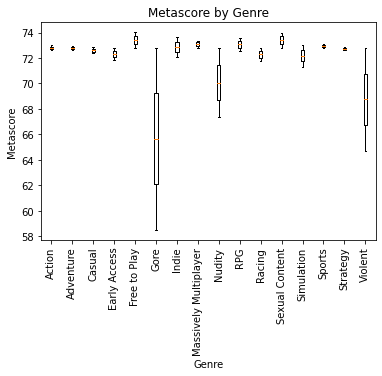

In [14]:
#group the top genres by 'Metacritic score'
action_df = big_genre_df.groupby(big_genre_df["Action"])["Metacritic score"].mean()
adventure_df = big_genre_df.groupby(big_genre_df["Adventure"])["Metacritic score"].mean()
casual_df = big_genre_df.groupby(big_genre_df["Casual"])["Metacritic score"].mean()
eacess_df = big_genre_df.groupby(big_genre_df["Early Access"])["Metacritic score"].mean()
free_df = big_genre_df.groupby(big_genre_df["Free to Play"])["Metacritic score"].mean()
gore_df = big_genre_df.groupby(big_genre_df["Gore"])["Metacritic score"].mean()
indie_df = big_genre_df.groupby(big_genre_df["Indie"])["Metacritic score"].mean()
multi_df = big_genre_df.groupby(big_genre_df["Massively Multiplayer"])["Metacritic score"].mean()
nude_df = big_genre_df.groupby(big_genre_df["Nudity"])["Metacritic score"].mean()
rpg_df = big_genre_df.groupby(big_genre_df["RPG"])["Metacritic score"].mean()
race_df = big_genre_df.groupby(big_genre_df["Racing"])["Metacritic score"].mean()
sex_df = big_genre_df.groupby(big_genre_df["Sexual Content"])["Metacritic score"].mean()
sim_df = big_genre_df.groupby(big_genre_df["Simulation"])["Metacritic score"].mean()
sport_df = big_genre_df.groupby(big_genre_df["Sports"])["Metacritic score"].mean()
strat_df = big_genre_df.groupby(big_genre_df["Strategy"])["Metacritic score"].mean()
vio_df = big_genre_df.groupby(big_genre_df["Violent"])["Metacritic score"].mean()

#make a dataframe of each of the top genres and their average 'Metacritic score'
big_genre_df = [action_df, adventure_df, casual_df, eacess_df,\
              free_df,gore_df,indie_df,multi_df,nude_df,rpg_df,race_df,\
             sex_df,sim_df,sport_df,strat_df,vio_df]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot each df as a boxplot
for i in range(len(big_genre_df)):
    ax.boxplot(big_genre_df[i], positions=[i+1])

# Add x-axis labels
plt.xticks(range(1, len(big_genre_df)+1), ['Action', 'Adventure', 'Casual', 'Early Access', \
                                         'Free to Play', 'Gore', 'Indie', 'Massively Multiplayer', \
                                         'Nudity', 'RPG', 'Racing', 'Sexual Content', 'Simulation', \
                                         'Sports', 'Strategy', 'Violent'], rotation=90)

# Add a title and y-axis label
plt.title('Metascore by Genre')
plt.ylabel('Metascore')
plt.xlabel('Genre')

print(multi_df)
print(indie_df)
print(rpg_df)
print(sex_df)
print(free_df)
# Show the plot
plt.show()

In [15]:
#top games by average playtime
play_scores_df = top_scores_df.groupby(["Name","Average playtime forever"])\
.mean().sort_values(by="Average playtime forever",ascending=False)
play_scores_df.head()

,,AppID,Peak CCU,Required age,Price,DLC count,Windows,Mac,Linux,Metacritic score,User score,...,Score rank,Achievements,Recommendations,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Estimated Owners,year,month,day
Name,Average playtime forever,,,,,,,,,,,,,,,,,,,,,
Brigade E5: New Jagged Union,42773,296210.0,2.0,0.0,3.99,0.0,True,False,False,41.0,0.0,...,NaN,0.0,0.0,0.0,42773.0,0.0,10000.0,2014.0,4.0,30.0
Dota 2,37162,570.0,558759.0,0.0,0.00,2.0,True,True,True,90.0,0.0,...,NaN,0.0,14300.0,1647.0,880.0,749.0,150000000.0,2013.0,7.0,9.0
Counter-Strike: Global Offensive,30484,730.0,825215.0,0.0,0.00,1.0,True,True,True,83.0,0.0,...,NaN,167.0,3441592.0,777.0,6357.0,253.0,75000000.0,2012.0,8.0,21.0
FINAL FANTASY XIV Online,27478,39210.0,31735.0,13.0,19.99,1.0,True,False,False,83.0,0.0,...,NaN,0.0,53578.0,1553.0,3248.0,1641.0,3500000.0,2014.0,2.0,18.0
Football Manager 2019,25933,872790.0,2193.0,0.0,0.00,0.0,True,True,False,86.0,0.0,...,NaN,77.0,7310.0,0.0,14356.0,0.0,1500000.0,2018.0,11.0,2.0


In [16]:
#find games with top average playtime and show average 'Metacritic score' 
play_scores_df = top_scores_df.groupby(["Name"])\
["Average playtime forever","Metacritic score"].mean().sort_values(by="Average playtime forever",ascending=False)
play_scores_df.head(20)

<ipython-input-16-15bf5f5e3cbd>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  play_scores_df = top_scores_df.groupby(["Name"])\


,Average playtime forever,Metacritic score
Name,,
Brigade E5: New Jagged Union,42773.0,41.0
Dota 2,37162.0,90.0
Counter-Strike: Global Offensive,30484.0,83.0
FINAL FANTASY XIV Online,27478.0,83.0
Football Manager 2019,25933.0,86.0
Football Manager 2020,22882.0,84.0
Rust,16623.0,69.0
Rocket League®,15653.0,86.0
PuzzleQuest: Challenge of the Warlords,14459.0,84.0


In [17]:
#metascore by publisher
pub_scores_df = top_scores_df.groupby(["Publishers"])\
["Average playtime forever","Metacritic score"].mean().sort_values(by="Average playtime forever",ascending=False)
pub_scores_df.head(25)

<ipython-input-17-3ff3cffcfc09>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pub_scores_df = top_scores_df.groupby(["Publishers"])\


,Average playtime forever,Metacritic score
Publishers,,
Facepunch Studios,16623.000000,69.000000
Psyonix LLC,15653.000000,86.000000
Studio Wildcard,10660.000000,70.000000
Ludeon Studios,10424.000000,87.000000
Digital Extremes,9533.000000,69.000000
Bungie,9390.000000,83.000000
GIANTS Software,8804.000000,69.000000
Grinding Gear Games,8194.000000,86.000000
Pearl Abyss,8122.000000,73.000000


In [18]:
#metascore by developer
dev_scores_df = top_scores_df.groupby(["Developers","Name"])\
["Average playtime forever","Metacritic score"].mean().sort_values(by="Metacritic score",ascending=False)
dev_scores_df.head(25)

<ipython-input-18-ba2cf42cad97>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dev_scores_df = top_scores_df.groupby(["Developers","Name"])\


Average playtime forever  \
Developers                                   Name                                                                           
ATLUS                                        Persona 5 Royal                                                        381.0   
ZA/UM                                        Disco Elysium - The Final Cut                                          979.0   
2K Boston,2K Australia                       BioShock™                                                              345.0   
Rockstar North                               Grand Theft Auto V                                                   13650.0   
Valve                                        Half-Life                                                              459.0   
                                             Half-Life 2                                                            606.0   
                                             Portal 2                                                               437.0   
BioWare                                      Mass Effect 2 (2010)                                                  2759.0   
Bethesda Game Studios®                       The Elder Scrolls IV: Oblivion® Game of the Yea...                       0.0   
Bethesda Game Studios                        The Elder Scrolls V: Skyrim                                           6458.0   
                                             The Elder Scrolls IV: Oblivion® Game of the Yea...                    1522.0   
Firaxis Games                                Sid Meier's Civilization® IV                                           174.0   
BioWare                                      Mass Effect 2 (2010) Edition                                             0.0   
Irrational Games,Virtual Programming (Linux) BioShock Infinite                                                      719.0   
FromSoftware Inc.                            ELDEN RING                                                            5293.0   
id Software,Nightdive Studios,MachineGames   QUAKE                                                                  243.0   
Larian Studios                               Divinity: Original Sin - Enhanced Edition                             1876.0   
Santa Monica Studio                          God of War                                                            1855.0   
Relic Entertainment                          Company of Heroes - Legacy Edition                                     470.0   
                                             Company of Heroes                                                     1457.0   
Larian Studios                               Divinity: Original Sin 2 - Definitive Edition                         4120.0   
Rockstar Games                               Red Dead Redemption 2                                                 5776.0   
Supergiant Games                             Hades                                                                 2075.0   
Monstars Inc.,Resonair,Stage Games           Tetris® Effect: Connected                                             1350.0   
Epic Games, Inc.                             Unreal Tournament 2004: Editor's Choice Edition                        186.0   

                                                                                                 Metacritic score  
Developers                                   Name                                                                  
ATLUS                                        Persona 5 Royal                                                 97.0  
ZA/UM                                        Disco Elysium - The Final Cut                                   97.0  
2K Boston,2K Australia                       BioShock™                                                       96.0  
Rockstar North                               Grand Theft Auto V                                              96.0  
Valve                    

In [19]:
#metascore by price
price_scores_df = top_scores_df.groupby(["Price","Name"])\
["Average playtime forever","Metacritic score"].mean().sort_values(by="Metacritic score",ascending=False)
price_scores_df.head(25)

<ipython-input-19-5b258a114462>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  price_scores_df = top_scores_df.groupby(["Price","Name"])\


Average playtime forever  \
Price Name                                                                           
39.99 Disco Elysium - The Final Cut                                          979.0   
59.99 Persona 5 Royal                                                        381.0   
0.00  Grand Theft Auto V                                                   13650.0   
      BioShock™                                                              345.0   
9.99  Half-Life                                                              459.0   
      Half-Life 2                                                            606.0   
      Portal 2                                                               437.0   
19.99 The Elder Scrolls V: Skyrim                                           6458.0   
9.99  QUAKE                                                                  243.0   
19.99 Sid Meier's Civilization® IV                                           174.0   
      The Elder Scrolls IV: Oblivion® Game of the Yea...                       0.0   
14.99 The Elder Scrolls IV: Oblivion® Game of the Yea...                    1522.0   
39.99 Divinity: Original Sin - Enhanced Edition                             1876.0   
7.50  Mass Effect 2 (2010) Edition                                             0.0   
59.99 ELDEN RING                                                            5293.0   
19.99 Mass Effect 2 (2010)                                                  2759.0   
29.99 BioShock Infinite                                                      719.0   
19.99 Company of Heroes                                                     1457.0   
      Company of Heroes - Legacy Edition                                     470.0   
39.99 Tetris® Effect: Connected                                             1350.0   
44.99 Divinity: Original Sin 2 - Definitive Edition                         4120.0   
39.99 The Witcher® 3: Wild Hunt                                             3696.0   
59.99 Half-Life: Alyx                                                        802.0   
29.99 Red Dead Redemption 2                                                 5776.0   
14.99 Unreal Tournament 2004: Editor's Choice Edition                        186.0   

                                                          Metacritic score  
Price Name                                                                  
39.99 Disco Elysium - The Final Cut                                   97.0  
59.99 Persona 5 Royal                                                 97.0  
0.00  Grand Theft Auto V                                              96.0  
      BioShock™                                                       96.0  
9.99  Half-Life                                                       96.0  
      Half-Life 2                                                     96.0  
      Portal 2                                                        95.0  
19.99 The Elder Scrolls V: Skyrim                                     94.0  
9.99  QUAKE                                                           94.0  
19.99 Sid Meier's Civilization® IV                                    94.0  
      The Elder Scrolls IV: Oblivion® Game of the Yea...              94.0  
14.99 The Elder Scrolls IV: Oblivion® Game of the Yea...              94.0  
39.99 Divinity: Original Sin - Enhanced Edition                       94.0  
7.50  Mass Effect 2 (2010) Edition                                    94.0  
59.99 ELDEN RING                                                      94.0  
19.99 Mass Effect 2 (2010)                                            94.0  
29.99 BioShock Infinite                                               94.0  
19.99 Company of Heroes                                               93.0  
      Company of Heroes - Legacy Edition                              93.0  
39.99 Tetris® Effect: Connected                                       93.0  
44.99 Divinity: Original Sin 2 - Definiti

In [20]:
#metascore by estimated owner
owner_scores_df = top_scores_df.groupby(["Estimated owners"])\
["Average playtime forever","Metacritic score"].mean().sort_values(by="Average playtime forever",ascending=False)
owner_scores_df.head(25)

<ipython-input-20-1fb404db565c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  owner_scores_df = top_scores_df.groupby(["Estimated owners"])\


,Average playtime forever,Metacritic score
Estimated owners,,
100000000 - 200000000,37162.000000,90.000000
50000000 - 100000000,15944.000000,81.666667
20000000 - 50000000,7517.500000,83.500000
10000000 - 20000000,4403.291667,82.000000
5000000 - 10000000,3350.615385,80.634615
2000000 - 5000000,1940.668367,81.530612
1000000 - 2000000,1199.519164,78.456446
500000 - 1000000,823.601050,76.448819
200000 - 500000,526.330733,73.900156


In [21]:
owner_scores_df = owner_scores_df.rename(index={'100000000 - 200000000': '100M - 200M',\
                                                '50000000 - 100000000': '50M - 100M',\
                                                '20000000 - 50000000': '20M - 50M', \
                                                '10000000 - 20000000': '10M - 20M',\
                                               '5000000 - 10000000': '5M - 10M',\
                                               '2000000 - 5000000': '2M - 5M',\
                                               '1000000 - 2000000': '1M - 2M',\
                                               '500000 - 1000000': '500K - 1M',\
                                               '200000 - 500000': '200K - 500K',\
                                               '100000 - 200000': '100K - 200K',\
                                               '50000 - 100000': '50K - 100K',\
                                               '20000 - 50000': '20K - 50K',\
                                               '0 - 20000': '0 - 20K'})

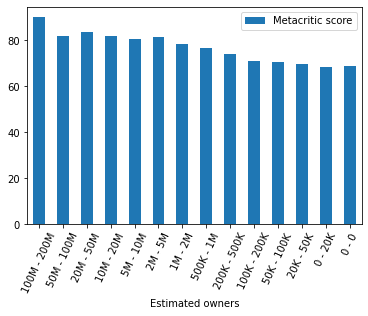

In [22]:
owner_scores_df.plot(kind='bar',y="Metacritic score")
plt.xticks(rotation=65)
plt.show()

In [23]:
play = top_scores_df['Average playtime two weeks']
score = top_scores_df['Metacritic score']
correlation = stats.pearsonr(play, score)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.09


In [24]:
price = top_scores_df['Price']
score = top_scores_df['Metacritic score']
correlation = stats.pearsonr(price, score)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.2


In [25]:
pos = top_scores_df['Positive']
score = top_scores_df['Metacritic score']
correlation = stats.pearsonr(pos, score)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.11


In [26]:
peak = top_scores_df['Peak CCU']
score = top_scores_df['Metacritic score']
correlation = stats.pearsonr(peak, score)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.07


In [27]:
steam_actual_tags_onehot_df = top_scores_df['Tags'].str.split(",").str.join('|').str.get_dummies()
big_tag_df = top_scores_df.join(steam_actual_tags_onehot_df)

In [28]:
sum_df = steam_actual_tags_onehot_df.sum().sort_values(ascending=False)
sum_df.head(10)

Singleplayer        2773
Action              2221
Adventure           2142
Indie               2001
Atmospheric         1392
Great Soundtrack    1280
Story Rich          1206
Multiplayer         1187
Strategy            1111
RPG                  976
dtype: int64

In [29]:
tag = big_tag_df['Singleplayer']
score = big_tag_df['Metacritic score']
correlation = stats.pearsonr(tag, score)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.23


In [30]:
tags_df = game_df[["Name","Tags","Positive"]]
tags_df.head()

,Name,Tags,Positive
36165,Carmageddon Max Pack,"Combat Racing,Racing,Action,Classic,Indie,Gore...",606
22217,POSTAL,"Horror,Twin Stick Shooter,Top-Down Shooter,Vil...",4806
49557,Half-Life,"FPS,Singleplayer,Sci-fi,Multiplayer,1990's,Act...",73346
19555,Team Fortress Classic,"Action,FPS,Multiplayer,Classic,Hero Shooter,Sh...",5677
17218,Legacy of Kain: Soul Reaver,"Adventure,Action,Vampire,Classic,Story Rich,Da...",1252


In [31]:
tags_df = game_df.groupby("Tags")["Positive"].mean()
tags_df.head()

Tags
1980s,Action,Retro,Pixel Graphics,Platformer,Side Scroller,2D Platformer,Action-Adventure,Trading Card Game,Trading,2D,Colorful,Funny,Old School,Time Travel,Combat,Controller,Singleplayer                        6.0
1980s,Cyberpunk,Retro,Text-Based,Crime,Trading,Replay Value,Dark Humor,Minimalist,Colorful,Management,Strategy,Dark Comedy,Casual,Capitalism,Dystopian,Stylized,Political,Dark,Conspiracy                          7.0
1980s,Electronic Music,Runner,Difficult,3D Platformer,Arcade,Physics,Atmospheric,Platformer,Precision Platformer,Colorful,Singleplayer,Action,Retro,Stylized,3D,Casual,Controller,Sci-fi,Indie                    14.0
1980s,Old School,PvP,Local Multiplayer,Multiplayer,Retro,Strategy,Space,Arcade,Minimalist,Pixel Graphics,Action,2D,Top-Down,Bullet Hell,Fighting,Top-Down Shooter,Competitive,Free to Play                        22.0
1980s,Platformer,Side Scroller,Pixel Graphics,Retro,Difficult,2D Platformer,Action,Old School,Metroidvania,Indie,2D,Singleplayer,Arcade

In [32]:
new_tags_review_df = game_df['Tags'].str.split(",").str.join('|').str.get_dummies()
new_tags_review_df

,1980s,1990's,2.5D,2D,2D Fighter,2D Platformer,360 Video,3D,3D Fighter,3D Platformer,...,Well-Written,Werewolves,Western,Wholesome,Word Game,World War I,World War II,Wrestling,Zombies,e-sports
36165,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22217,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49557,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19555,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17218,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74635,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74587,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63777,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65533,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
tags_sum_df = new_tags_review_df.sum()
tags_sum_df = tags_sum_df.sort_values(ascending=False)
tags_sum_df = tags_sum_df.head(20)
tags_sum_df

Indie             37644
Singleplayer      29642
Action            26487
Casual            25345
Adventure         24668
2D                15714
Strategy          12502
Simulation        12297
RPG               10916
Puzzle            10447
Atmospheric       10111
3D                 8447
Early Access       8327
Pixel Graphics     8205
Story Rich         8086
Colorful           7752
Multiplayer        7187
Cute               7131
Arcade             7004
Exploration        6823
dtype: int64

In [34]:
owners_df = game_df[["Name", "Estimated owners"]]
owners_df = owners_df.head(20)
owners_df

,Name,Estimated owners
36165,Carmageddon Max Pack,100000 - 200000
22217,POSTAL,5000000 - 10000000
49557,Half-Life,5000000 - 10000000
19555,Team Fortress Classic,5000000 - 10000000
17218,Legacy of Kain: Soul Reaver,500000 - 1000000
39055,Half-Life: Opposing Force,5000000 - 10000000
34638,Ricochet,5000000 - 10000000
39428,Counter-Strike,10000000 - 20000000
33814,Gothic 1,500000 - 1000000
50362,Half-Life: Blue Shift,10000000 - 20000000


In [35]:
owners_df = game_df[["Name", "Estimated owners"]]
owners_df = owners_df.sort_values("Estimated owners", ascending=False)
owners_df.head(20)

,Name,Estimated owners
46158,Counter-Strike: Global Offensive,50000000 - 100000000
7030,New World,50000000 - 100000000
30583,Team Fortress 2,50000000 - 100000000
8885,PUBG: BATTLEGROUNDS,50000000 - 100000000
12007,Dying Light,5000000 - 10000000
52186,HITMAN™ 2,5000000 - 10000000
61025,The Tiny Bang Story,5000000 - 10000000
52952,Factorio,5000000 - 10000000
13247,Oddworld: Abe's Oddysee®,5000000 - 10000000
2758,Half-Life 2: Episode Two,5000000 - 10000000


In [36]:
#find estimated owners for genres
#find estimated owners for tags
#find estimated owners for developers
#find estimated owners for publishers 

In [37]:
genres_df = game_df[["Genres","Estimated owners"]]
genres_df = genres_df.sort_values("Estimated owners", ascending=False)
genres_df.head(20)

,Genres,Estimated owners
46158,"Action,Free to Play",50000000 - 100000000
7030,"Action,Adventure,Massively Multiplayer,RPG",50000000 - 100000000
30583,"Action,Free to Play",50000000 - 100000000
8885,"Action,Adventure,Free to Play,Massively Multip...",50000000 - 100000000
12007,"Action,RPG",5000000 - 10000000
52186,Action,5000000 - 10000000
61025,"Adventure,Casual,Indie",5000000 - 10000000
52952,"Casual,Indie,Simulation,Strategy",5000000 - 10000000
13247,Adventure,5000000 - 10000000
2758,Action,5000000 - 10000000


In [38]:
tag_df = game_df[["Tags","Estimated owners"]]
tag_df = tag_df.sort_values("Estimated owners", ascending=False)
tag_df.head(20)

,Tags,Estimated owners
46158,"FPS,Shooter,Multiplayer,Competitive,Action,Tea...",50000000 - 100000000
7030,"Massively Multiplayer,Open World,MMORPG,RPG,Ad...",50000000 - 100000000
30583,"Free to Play,Hero Shooter,Multiplayer,FPS,Shoo...",50000000 - 100000000
8885,"Survival,Shooter,Multiplayer,Battle Royale,FPS...",50000000 - 100000000
12007,"Zombies,Survival Horror,Horror,Online Co-Op,Op...",5000000 - 10000000
52186,"Stealth,Assassin,Action,Singleplayer,Third Per...",5000000 - 10000000
61025,"Point & Click,Puzzle,Hand-drawn,Steampunk,Retr...",5000000 - 10000000
52952,"Automation,Base-Building,Resource Management,S...",5000000 - 10000000
13247,"Adventure,Platformer,Classic,Puzzle,2D,Singlep...",5000000 - 10000000
2758,"FPS,Action,Sci-fi,Singleplayer,Shooter,Story R...",5000000 - 10000000


In [39]:
developer_df = game_df[["Developers","Estimated owners"]]
developer_df = developer_df.sort_values("Estimated owners", ascending=False)
developer_df.head(20)

,Developers,Estimated owners
46158,"Valve,Hidden Path Entertainment",50000000 - 100000000
7030,Amazon Games,50000000 - 100000000
30583,Valve,50000000 - 100000000
8885,"KRAFTON, Inc.",50000000 - 100000000
12007,Techland,5000000 - 10000000
52186,IO Interactive A/S,5000000 - 10000000
61025,Colibri Games,5000000 - 10000000
52952,Wube Software LTD.,5000000 - 10000000
13247,Oddworld Inhabitants,5000000 - 10000000
2758,Valve,5000000 - 10000000


In [40]:
publisher_df = game_df[["Publishers","Estimated owners"]]
publisher_df = publisher_df.sort_values("Estimated owners", ascending=False)
publisher_df.head(20)

,Publishers,Estimated owners
46158,Valve,50000000 - 100000000
7030,Amazon Games,50000000 - 100000000
30583,Valve,50000000 - 100000000
8885,"KRAFTON, Inc.",50000000 - 100000000
12007,Techland,5000000 - 10000000
52186,IO Interactive A/S,5000000 - 10000000
61025,Colibri Games,5000000 - 10000000
52952,Wube Software LTD.,5000000 - 10000000
13247,Oddworld Inhabitants,5000000 - 10000000
2758,Valve,5000000 - 10000000


In [42]:
genres_review_df = game_df['Genres'].str.split(",").str.join('|').str.get_dummies()
genres_review_df = genres_review_df.sum()
genres_review_df = genres_review_df.sort_values(ascending=False)
genres_review_df.head(20)

Indie                    50590
Casual                   30039
Action                   29937
Adventure                27728
Simulation               14176
Strategy                 13693
RPG                      12581
Early Access              8803
Free to Play              5931
Sports                    3302
Racing                    2674
Massively Multiplayer     1880
Utilities                  767
Violent                    509
Design & Illustration      457
Education                  374
Animation & Modeling       372
Gore                       305
Video Production           264
Game Development           203
dtype: int64

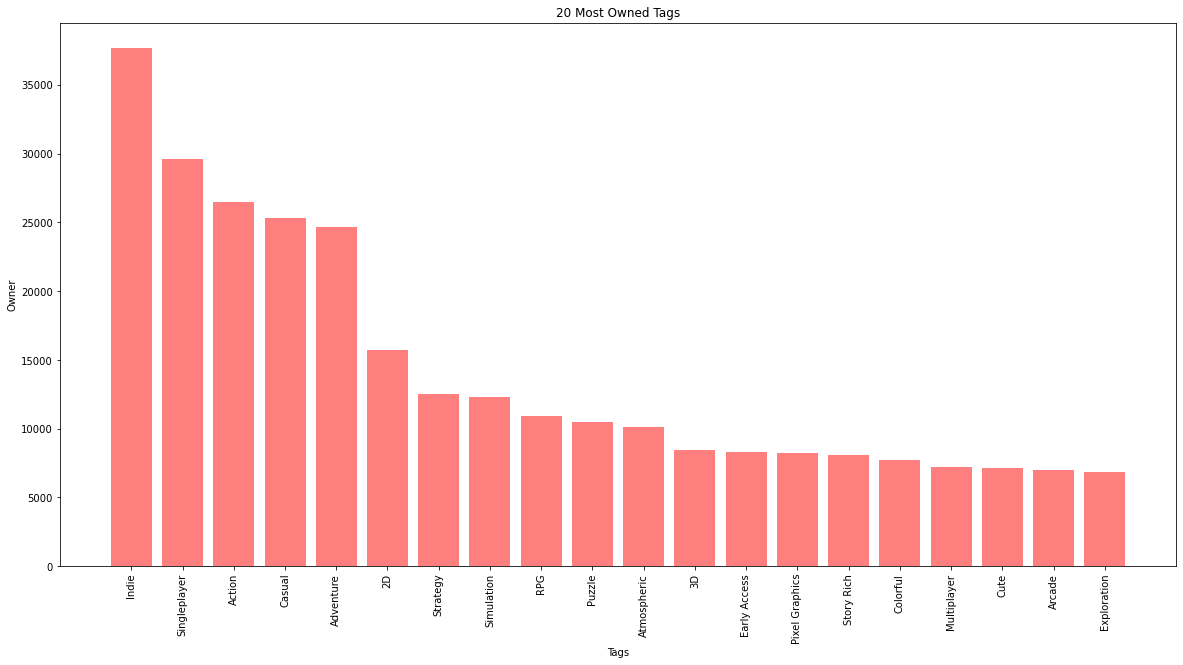

In [44]:
tags = [37644,29642,26487,25345,24668,15714,12502,12297,10916,10447,10111,8447,8327,8205,8086,7752,7187,7131,7004,6823]
tags_x_axis = np.arange(len(tags))
tags_tick_location = [value for value in tags_x_axis]
plt.figure(figsize=(20,10))
plt.bar(tags_x_axis,tags, color="red", alpha=0.5, align="center")
plt.xticks(tags_tick_location, ["Indie","Singleplayer","Action","Casual","Adventure",
                                "2D","Strategy","Simulation","RPG","Puzzle","Atmospheric",
                                "3D","Early Access","Pixel Graphics","Story Rich","Colorful","Multiplayer","Cute","Arcade","Exploration"], rotation="vertical")
plt.title("20 Most Owned Tags")
plt.xlabel("Tags")
plt.ylabel("Owner")
plt.show()

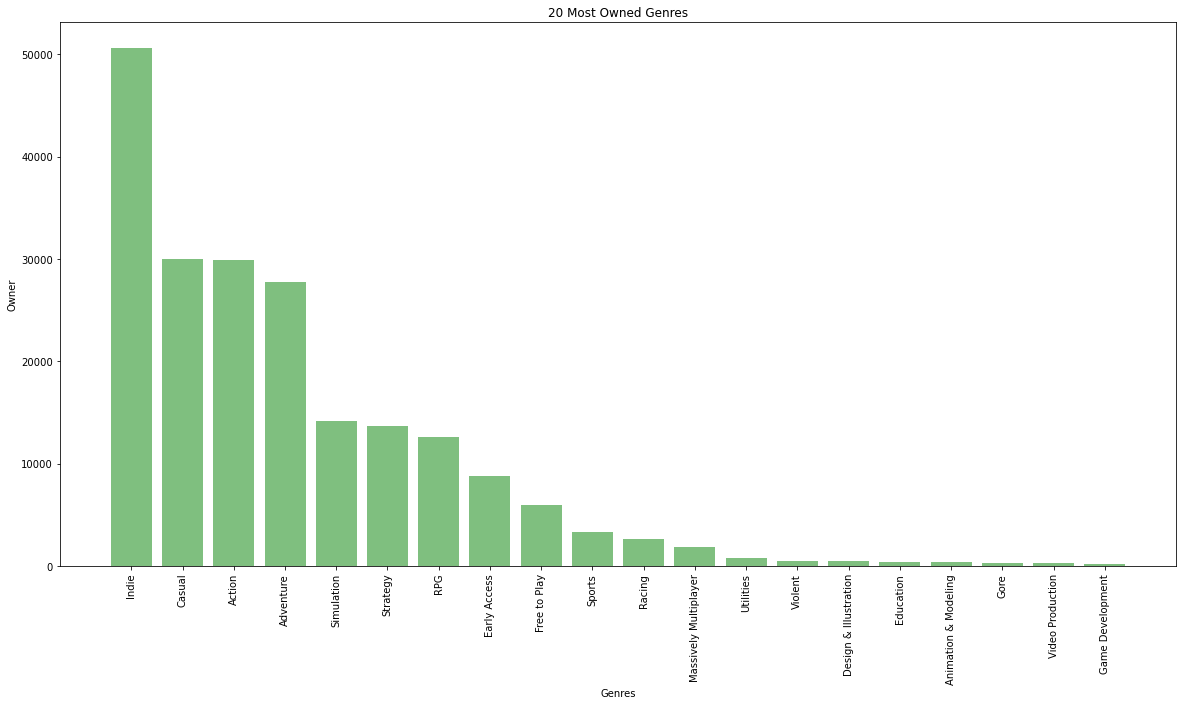

In [45]:
genres = [50590,30039,29937,27728,14176,13693,12581,8803,5931,3302,2674,1880,767,509,457,374,372,305,264,203]
genres_x_axis = np.arange(len(genres))
genres_tick_location = [value for value in genres_x_axis]
plt.figure(figsize=(20,10))
plt.bar(genres_x_axis,genres, color="green", alpha=0.5, align="center")
plt.xticks(genres_tick_location, ["Indie","Casual","Action","Adventure","Simulation","Strategy","RPG","Early Access",
                                  "Free to Play","Sports","Racing","Massively Multiplayer","Utilities","Violent",
                                  "Design & Illustration","Education","Animation & Modeling","Gore","Video Production",
                                  "Game Development"], rotation="vertical")
plt.title("20 Most Owned Genres")
plt.xlabel("Genres")
plt.ylabel("Owner")
plt.show()

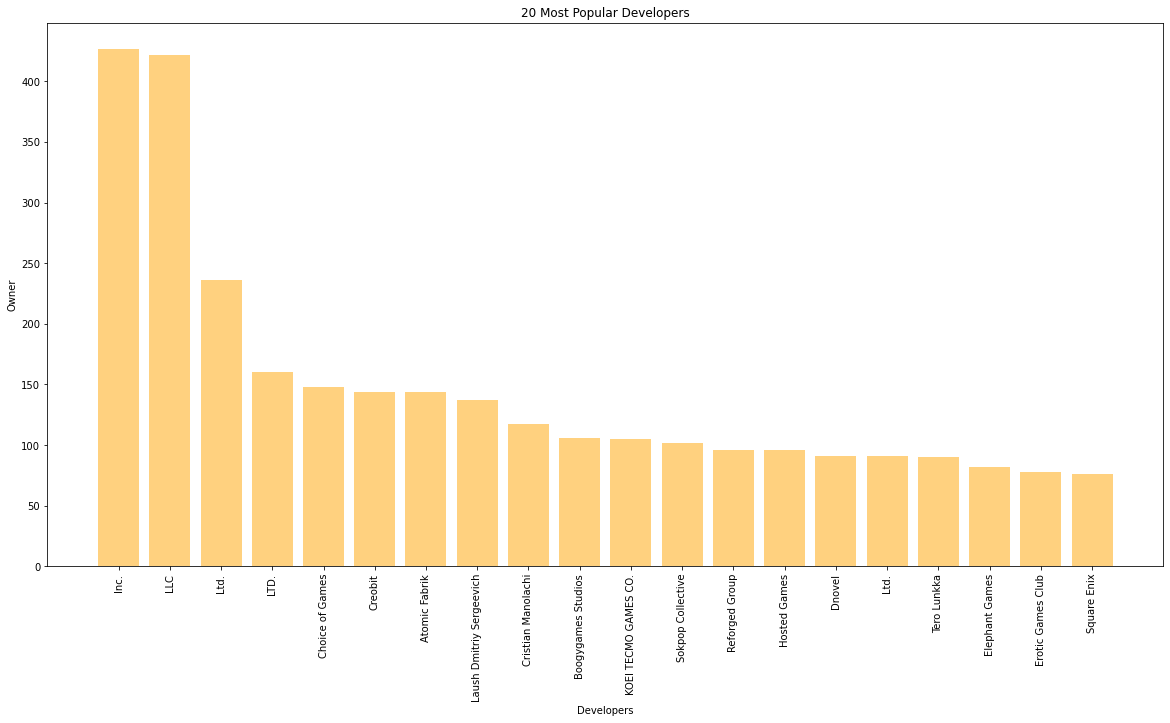

In [46]:
developers = [427,422,236,160,148,144,144,137,117,106,105,102,96,96,91,91,90,82,78,76]
developers_x_axis = np.arange(len(developers))
developers_tick_location = [value for value in developers_x_axis]
plt.figure(figsize=(20,10))
plt.bar(developers_x_axis,developers, color="orange", alpha=0.5, align="center")
plt.xticks(developers_tick_location, ["Inc.","LLC","Ltd.","LTD.","Choice of Games","Creobit","Atomic Fabrik",
                                      "Laush Dmitriy Sergeevich","Cristian Manolachi","Boogygames Studios","KOEI TECMO GAMES CO.",
                                      "Sokpop Collective","Reforged Group","Hosted Games","Dnovel","Ltd.","Tero Lunkka",
                                      "Elephant Games","Erotic Games Club","Square Enix"], rotation="vertical")
plt.title("20 Most Popular Developers")
plt.xlabel("Developers")
plt.ylabel("Owner")
plt.show()

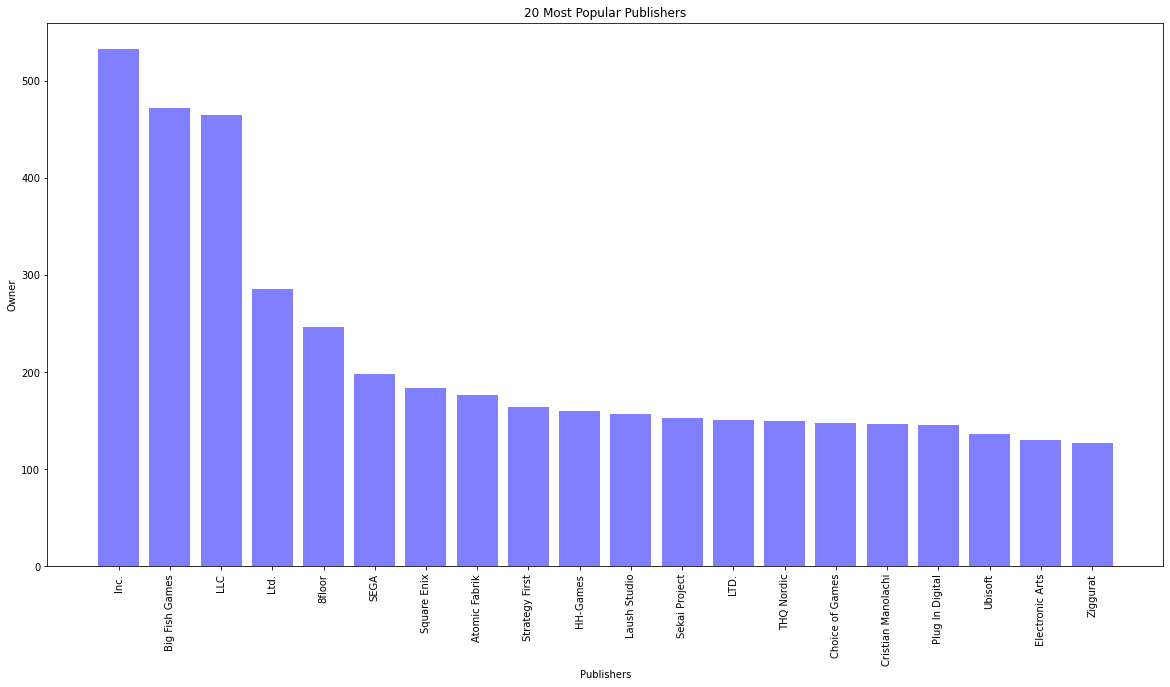

In [47]:
publishers = [533,472,465,286,247,198,184,176,164,160,157,153,151,150,148,147,146,136,130,127]
publishers_x_axis = np.arange(len(publishers))
publishers_tick_location = [value for value in publishers_x_axis]
plt.figure(figsize=(20,10))
plt.bar(publishers_x_axis,publishers, color="blue", alpha=0.5, align="center")
plt.xticks(publishers_tick_location, ["Inc.","Big Fish Games","LLC","Ltd.","8floor","SEGA","Square Enix","Atomic Fabrik",
                                      "Strategy First","HH-Games","Laush Studio","Sekai Project","LTD.","THQ Nordic",
                                      "Choice of Games","Cristian Manolachi","Plug In Digital","Ubisoft","Electronic Arts",
                                      "Ziggurat"], rotation="vertical")
plt.title("20 Most Popular Publishers")
plt.xlabel("Publishers")
plt.ylabel("Owner")
plt.show()

In [41]:
reviews_df = game_df[(game_df["Positive"])>0]
reviews_df = reviews_df.sort_values(by="Positive", ascending=False)
reviews_df = reviews_df[["Name", "User score", "Positive", "Negative", "Score rank","Genres", "Tags", "Developers","Publishers"]]
reviews_df

,Name,User score,Positive,Negative,Score rank,Genres,Tags,Developers,Publishers
46158,Counter-Strike: Global Offensive,0,5764420,766677,NaN,"Action,Free to Play","FPS,Shooter,Multiplayer,Competitive,Action,Tea...","Valve,Hidden Path Entertainment",Valve
17585,Dota 2,0,1477153,300437,NaN,"Action,Free to Play,Strategy","Free to Play,MOBA,Multiplayer,Strategy,e-sport...",Valve,Valve
57205,Grand Theft Auto V,0,1171197,210154,NaN,"Action,Adventure","Open World,Action,Multiplayer,Automobile Sim,C...",Rockstar North,Rockstar Games
8885,PUBG: BATTLEGROUNDS,0,1154655,895978,NaN,"Action,Adventure,Free to Play,Massively Multip...","Survival,Shooter,Multiplayer,Battle Royale,FPS...","KRAFTON, Inc.","KRAFTON, Inc."
46416,Terraria,0,964983,21044,NaN,"Action,Adventure,Indie,RPG","Open World Survival Craft,Sandbox,Survival,2D,...",Re-Logic,Re-Logic
...,...,...,...,...,...,...,...,...,...
18790,Critters - Cute Cubs in a Cruel World,0,1,0,NaN,"Indie,Early Access","Indie,Early Access,Cute",EmberSparkz,EmberSparkz
4871,Guardians of Greenheart,0,1,1,NaN,"Adventure,Indie,RPG","Anime,Fantasy,Turn-Based Tactics,Difficult,RPG...",Silver Cloud Games,Silver Cloud Games
4108,QontoWars,0,1,0,NaN,"Indie,Early Access","FPS,Multiplayer,3D,Team-Based,First-Person,Gun...",QontoLabs,QontoLabs
7545,Tower Attack,0,1,0,NaN,"Action,Casual,Indie","Tower Defense,2.5D,Procedural Generation,Famil...",ATD,ATD


In [42]:
games_reviews_df = reviews_df[["Name","Positive"]]
games_reviews_df = games_reviews_df.sort_values("Positive", ascending=False)
games_reviews_df = games_reviews_df.head(20)
games_reviews_df

,Name,Positive
46158,Counter-Strike: Global Offensive,5764420
17585,Dota 2,1477153
57205,Grand Theft Auto V,1171197
8885,PUBG: BATTLEGROUNDS,1154655
46416,Terraria,964983
8256,Tom Clancy's Rainbow Six® Siege,929372
30583,Team Fortress 2,823693
1289,Garry's Mod,822326
35001,Rust,703687
39530,Left 4 Dead 2,619457


In [43]:
score_reviews_df = reviews_df[["Name", "User score", "Positive"]]
score_reviews_df = score_reviews_df.sort_values("User score", ascending=False)
score_reviews_df = score_reviews_df.head(20)
score_reviews_df

,Name,User score,Positive
8563,The Tower of Five Hearts,100,16
13285,Hentai Strip Shot,100,26
2649,K Station,100,10
41482,Funbag Fantasy,100,21
59587,Hentai IQ Puzzle,100,27
46041,DEEP SPACE WAIFU: NEKOMIMI,98,362
13906,Meltys Quest,97,446
58820,Unlock Me,96,35
56379,Deep Space Waifu: FLAT JUSTICE,95,1449
51156,Ladykiller in a Bind,95,170


In [44]:
genre_reviews_df = reviews_df[["Name","Genres","Positive"]]
genre_reviews_df = genre_reviews_df.sort_values("Positive", ascending=False)
genre_reviews_df = genre_reviews_df.head(20)
genre_reviews_df

,Name,Genres,Positive
46158,Counter-Strike: Global Offensive,"Action,Free to Play",5764420
17585,Dota 2,"Action,Free to Play,Strategy",1477153
57205,Grand Theft Auto V,"Action,Adventure",1171197
8885,PUBG: BATTLEGROUNDS,"Action,Adventure,Free to Play,Massively Multip...",1154655
46416,Terraria,"Action,Adventure,Indie,RPG",964983
8256,Tom Clancy's Rainbow Six® Siege,Action,929372
30583,Team Fortress 2,"Action,Free to Play",823693
1289,Garry's Mod,"Indie,Simulation",822326
35001,Rust,"Action,Adventure,Indie,Massively Multiplayer,RPG",703687
39530,Left 4 Dead 2,Action,619457


In [45]:
genre_reviews_df = reviews_df.groupby("Genres")["Positive"].mean()
genre_reviews_df.head()

Genres
Accounting                                                                                                                                                                       1.5
Accounting,Animation & Modeling,Audio Production,Design & Illustration,Education,Photo Editing,Software Training,Utilities,Video Production,Web Publishing                       8.0
Accounting,Animation & Modeling,Audio Production,Design & Illustration,Education,Photo Editing,Software Training,Utilities,Video Production,Web Publishing,Game Development    262.0
Accounting,Education,Software Training,Utilities,Early Access                                                                                                                   10.0
Accounting,Utilities                                                                                                                                                             4.0
Name: Positive, dtype: float64

In [46]:
new_genre_reviews_df = reviews_df['Genres'].str.split(",").str.join("|").str.get_dummies()
new_genre_reviews_df

,360 Video,Accounting,Action,Adventure,Animation & Modeling,Audio Production,Casual,Design & Illustration,Documentary,Early Access,...,Short,Simulation,Software Training,Sports,Strategy,Tutorial,Utilities,Video Production,Violent,Web Publishing
46158,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17585,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
57205,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8885,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46416,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18790,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4871,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4108,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7545,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
genre_sum_df = new_genre_reviews_df.sum()
genre_sum_df = genre_sum_df.sort_values(ascending=False)
genre_sum_df = genre_sum_df.head(20)
genre_sum_df

Indie                    40709
Action                   24358
Casual                   22481
Adventure                22263
Strategy                 11128
Simulation               11127
RPG                       9909
Early Access              6558
Free to Play              3374
Sports                    2633
Racing                    2138
Massively Multiplayer     1409
Utilities                  611
Violent                    483
Design & Illustration      390
Animation & Modeling       299
Gore                       290
Education                  281
Video Production           204
Audio Production           156
dtype: int64

In [48]:
genre_sum_df.dtypes

dtype('int64')

In [49]:
tags_reviews_df = reviews_df[["Name","Tags","Positive"]]
tags_reviews_df = tags_reviews_df.sort_values("Positive", ascending=False)
tags_reviews_df

,Name,Tags,Positive
46158,Counter-Strike: Global Offensive,"FPS,Shooter,Multiplayer,Competitive,Action,Tea...",5764420
17585,Dota 2,"Free to Play,MOBA,Multiplayer,Strategy,e-sport...",1477153
57205,Grand Theft Auto V,"Open World,Action,Multiplayer,Automobile Sim,C...",1171197
8885,PUBG: BATTLEGROUNDS,"Survival,Shooter,Multiplayer,Battle Royale,FPS...",1154655
46416,Terraria,"Open World Survival Craft,Sandbox,Survival,2D,...",964983
...,...,...,...
55090,Infected Town,"Action,Arcade,Shooter,Arena Shooter,Top-Down S...",1
595,Power Ball 2021,"Action,Casual,Arcade,Pinball,2D,Minimalist,198...",1
21212,Hot Tiles,"Casual,Puzzle,2D,Minimalist,Logic,Relaxing,Ear...",1
23836,FAUN AIR -フォーンアイル-,"RPG,Party-Based RPG,2D Platformer,JRPG,CRPG,2D...",1


In [50]:
tags_reviews_df = reviews_df.groupby("Tags")["Positive"].mean()
tags_reviews_df.head()

Tags
1980s,Action,Retro,Pixel Graphics,Platformer,Side Scroller,2D Platformer,Action-Adventure,Trading Card Game,Trading,2D,Colorful,Funny,Old School,Time Travel,Combat,Controller,Singleplayer                        6.0
1980s,Cyberpunk,Retro,Text-Based,Crime,Trading,Replay Value,Dark Humor,Minimalist,Colorful,Management,Strategy,Dark Comedy,Casual,Capitalism,Dystopian,Stylized,Political,Dark,Conspiracy                          7.0
1980s,Electronic Music,Runner,Difficult,3D Platformer,Arcade,Physics,Atmospheric,Platformer,Precision Platformer,Colorful,Singleplayer,Action,Retro,Stylized,3D,Casual,Controller,Sci-fi,Indie                    14.0
1980s,Old School,PvP,Local Multiplayer,Multiplayer,Retro,Strategy,Space,Arcade,Minimalist,Pixel Graphics,Action,2D,Top-Down,Bullet Hell,Fighting,Top-Down Shooter,Competitive,Free to Play                        22.0
1980s,Platformer,Side Scroller,Pixel Graphics,Retro,Difficult,2D Platformer,Action,Old School,Metroidvania,Indie,2D,Singleplayer,Arcade

In [52]:
developers_df = reviews_df[["Name", "Developers", "Positive"]]
developers_df = developers_df.sort_values("Positive", ascending = False)
developers_df

,Name,Developers,Positive
46158,Counter-Strike: Global Offensive,"Valve,Hidden Path Entertainment",5764420
17585,Dota 2,Valve,1477153
57205,Grand Theft Auto V,Rockstar North,1171197
8885,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.",1154655
46416,Terraria,Re-Logic,964983
...,...,...,...
55090,Infected Town,INFINITE BRIDGE,1
595,Power Ball 2021,Paul Connor,1
21212,Hot Tiles,Igor Serdiukov,1
23836,FAUN AIR -フォーンアイル-,11PLANNING,1


In [53]:
developers_reviews_df = reviews_df.groupby("Developers")["Positive"].mean()
developers_reviews_df.head(20)

Developers
!CyberApex (SkagoGames)                1.000000
#12                                    2.000000
#NVJOB                                 4.000000
#workshop                           2239.333333
'Kill On Sight' Game development      10.000000
'What Day is it?' Games                3.000000
((no-end-parens Studio                 6.000000
(STCG) Smoker The Car Game             3.000000
+7 Software                           76.000000
+Mpact Games, LLC.                   149.000000
+Umbrella                             19.000000
---                                    7.000000
-Yodasaurus- Games                    10.000000
.                                      2.000000
.Cat                                  18.000000
.M.Y.W.                               11.500000
.ToNg                                  1.000000
.ez Games                             16.000000
//commentout                         316.000000
0 Deer Soft                           76.333333
Name: Positive, dtype: float6

In [54]:
developers_reviews_df = developers_reviews_df.sort_values(ascending = False)
developers_reviews_df = developers_reviews_df.head(20)
developers_reviews_df

Developers
Valve,Hidden Path Entertainment                                       5764420.0
Re-Logic                                                               964983.0
KRAFTON, Inc.                                                          578608.0
Innersloth                                                             577656.0
Wallpaper Engine Team                                                  522889.0
OVERKILL - a Starbreeze Studio.                                        520826.0
Psyonix LLC                                                            493188.0
ConcernedApe                                                           475785.0
FromSoftware Inc.                                                      460812.0
Smartly Dressed Games                                                  443320.0
Kinetic Games                                                          441220.0
Bungie                                                                 403109.0
Iron Gate AB                 

In [55]:
publishers_df = reviews_df[["Name", "Publishers", "Positive"]]
publishers_df = publishers_df.sort_values("Positive", ascending = False)
publishers_df

,Name,Publishers,Positive
46158,Counter-Strike: Global Offensive,Valve,5764420
17585,Dota 2,Valve,1477153
57205,Grand Theft Auto V,Rockstar Games,1171197
8885,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.",1154655
46416,Terraria,Re-Logic,964983
...,...,...,...
55090,Infected Town,INFINITE BRIDGE,1
595,Power Ball 2021,Paul Connor,1
21212,Hot Tiles,Igor Serdiukov,1
23836,FAUN AIR -フォーンアイル-,11PLANNING,1


In [56]:
publishers_reviews_df = publishers_df.groupby("Publishers")["Positive"].mean()
publishers_reviews_df.head(20)

Publishers
'Kill On Sight' Game Development      10.000000
((no-end-parens Studio                 6.000000
(STCG) Smoker The Car Game             3.000000
(none)                              4264.500000
++Good Games,GameChanger Charity      28.000000
+7 Software                           76.000000
+Mpact Games, LLC.                   149.000000
+Umbrella                             19.000000
-                                    139.000000
--                                     6.000000
---                                    7.000000
-In.                                  14.000000
-Yodasaurus- Games                    10.000000
.                                      6.500000
...                                   14.500000
.Cat                                  18.000000
.M.Y.W.                               11.500000
.ToNg                                  1.000000
.ez Games                             67.000000
0 Deer Soft Partnership               76.333333
Name: Positive, dtype: float6

In [57]:
publishers_reviews_df = publishers_reviews_df.sort_values(ascending = False)
publishers_reviews_df = publishers_reviews_df.head(20)
publishers_reviews_df

Publishers
Wallpaper Engine Team                                                     522889.000000
Psyonix LLC                                                               493188.000000
Re-Logic                                                                  482802.000000
ConcernedApe                                                              475785.000000
FromSoftware Inc.,Bandai Namco Entertainment                              460812.000000
Smartly Dressed Games                                                     443320.000000
Kinetic Games                                                             441220.000000
Bungie                                                                    403109.000000
Endnight Games Ltd                                                        368986.000000
FromSoftware, Inc.,Bandai Namco Entertainment                             310407.000000
Valve                                                                     308132.416667
Innersloth           

In [60]:
games_x_axis = np.arange(len(games_reviews_df))
games_tick_locations = [value for value in games_x_axis]

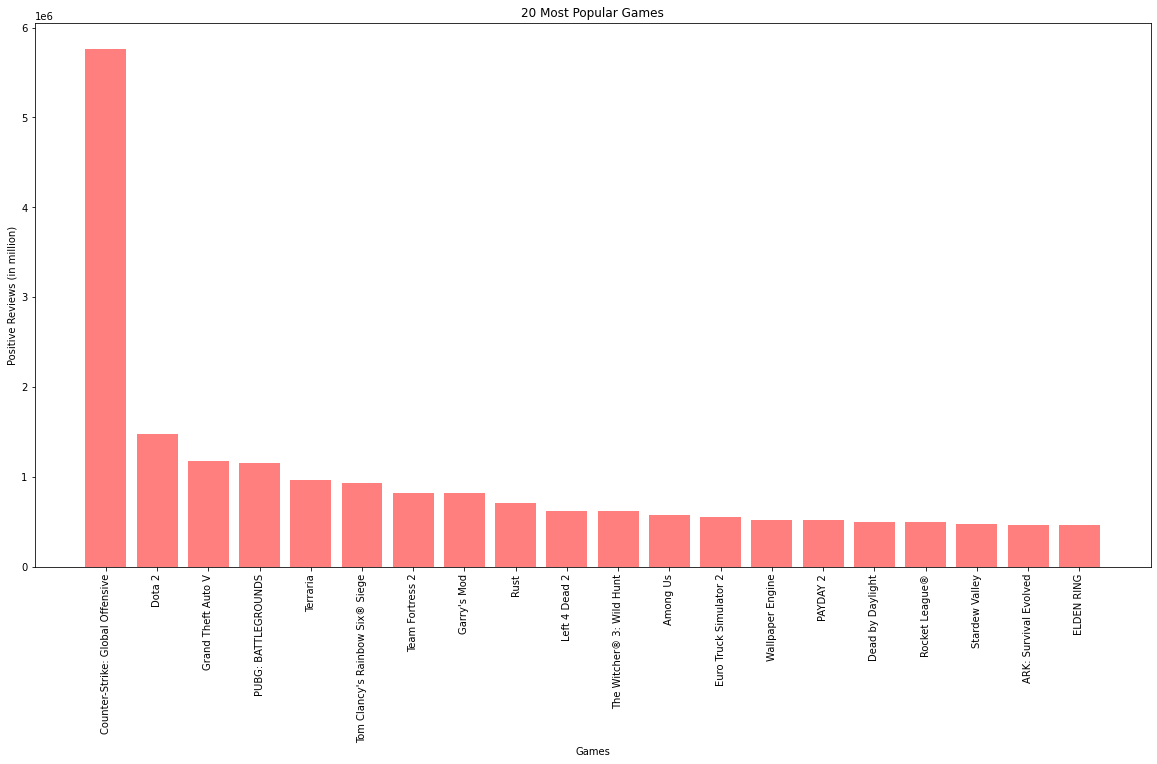

In [61]:
plt.figure(figsize=(20,10))
plt.bar(games_x_axis, games_reviews_df["Positive"], color='r', alpha=0.5, align="center")
plt.xticks(games_tick_locations, games_reviews_df["Name"], rotation="vertical")
plt.title("20 Most Popular Games")
plt.xlabel("Games")
plt.ylabel("Positive Reviews (in million)")
plt.show()

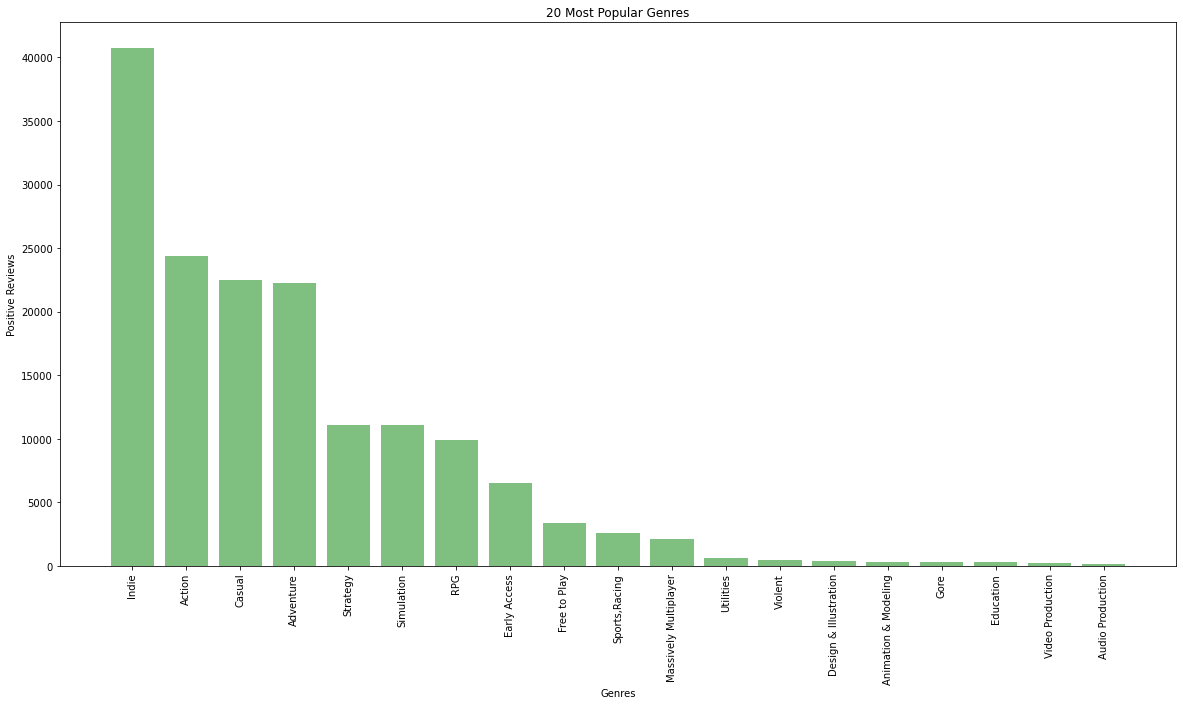

In [62]:
genres = [40709, 24358, 22481, 22263, 11128, 11127, 9909, 6558, 3374, 2633, 2138, 611,483,390,299,290,281,204,156]
genre_x_axis = np.arange(len(genres))
genre_tick_locations = [value for value in genre_x_axis]
plt.figure(figsize=(20,10))
plt.bar(genre_x_axis, genres, color='green', alpha=0.5, align="center")
plt.xticks(genre_tick_locations, ["Indie","Action","Casual","Adventure","Strategy","Simulation","RPG","Early Access",
                                  "Free to Play","Sports,Racing","Massively Multiplayer" ,"Utilities","Violent",
                                  "Design & Illustration","Animation & Modeling","Gore","Education","Video Production",
                                  "Audio Production"], rotation="vertical")
plt.title("20 Most Popular Genres")
plt.xlabel("Genres")
plt.ylabel("Positive Reviews")
plt.show()

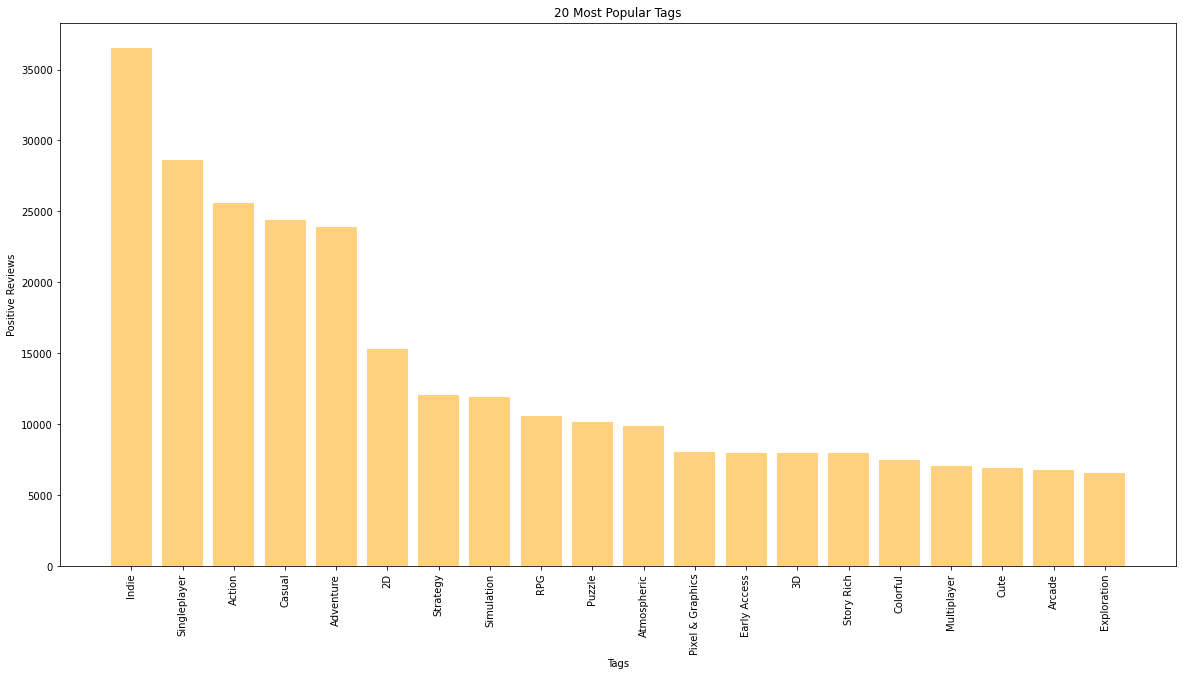

In [63]:
tags = [36484,28653,25579,24418,23924,15270,12079,11895,10585,10191,9891,8026,7993,7968,7945,7515,7060,6930,6752,6588]
tags_x_axis = np.arange(len(tags))
tags_tick_locations = [value for value in tags_x_axis]
plt.figure(figsize=(20,10))
plt.bar(tags_x_axis, tags, color='orange', alpha=0.5, align="center")
plt.xticks(tags_tick_locations, ["Indie","Singleplayer","Action","Casual","Adventure","2D","Strategy","Simulation",
                                 "RPG","Puzzle","Atmospheric","Pixel & Graphics","Early Access","3D","Story Rich",
                                 "Colorful","Multiplayer","Cute", "Arcade","Exploration"], rotation="vertical")
plt.title("20 Most Popular Tags")
plt.xlabel("Tags")
plt.ylabel("Positive Reviews")
plt.show()

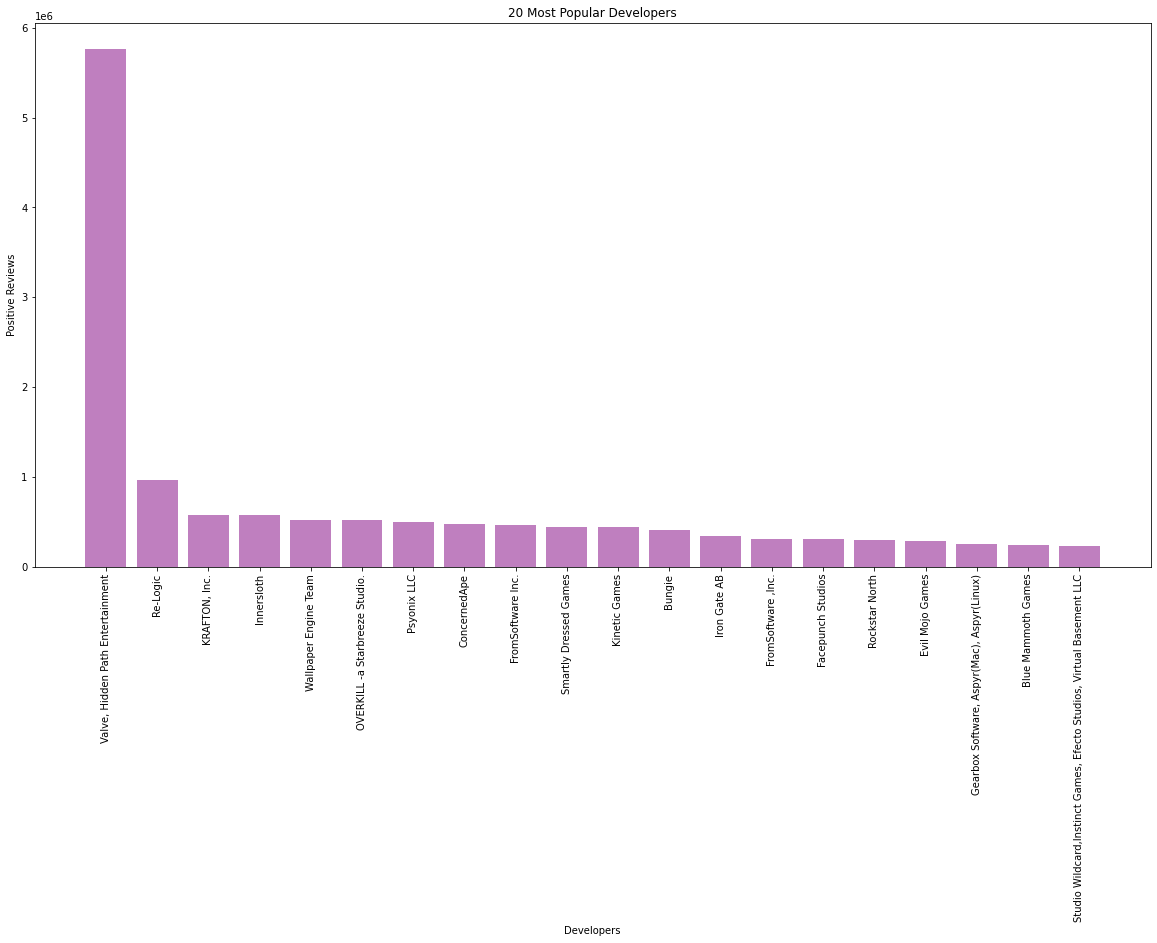

In [64]:
developers = [5764420.0,964983.0,578608.0,577656.0,522889.0,520826.0,493188.0,475785.0,460812.0,443320.0,441220.0,
              403109.0,337177.0,310407.0,305445.0,293461.5,280999.0,247833.0,246362.0,233839.5]
developers_x_axis = np.arange(len(developers))
developers_tick_locations = [value for value in developers_x_axis]
plt.figure(figsize=(20,10))
plt.bar(developers_x_axis, developers, color='purple', alpha=0.5, align="center")
plt.xticks(developers_tick_locations, ["Valve, Hidden Path Entertainment","Re-Logic","KRAFTON, Inc.","Innersloth",
                                 "Wallpaper Engine Team","OVERKILL -a Starbreeze Studio.","Psyonix LLC",
                                 "ConcernedApe","FromSoftware Inc.","Smartly Dressed Games","Kinetic Games",
                                 "Bungie","Iron Gate AB","FromSoftware ,Inc.","Facepunch Studios","Rockstar North",
                                 "Evil Mojo Games","Gearbox Software, Aspyr(Mac), Aspyr(Linux)","Blue Mammoth Games",
                                 "Studio Wildcard,Instinct Games, Efecto Studios, Virtual Basement LLC"], rotation = "vertical")
plt.title("20 Most Popular Developers")
plt.xlabel("Developers")
plt.ylabel("Positive Reviews")
plt.show()

C:\Users\gregw\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gregw\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22359 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gregw\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 28216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gregw\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25103 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\gregw\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26041 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\gregw\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 22359 missing from cur

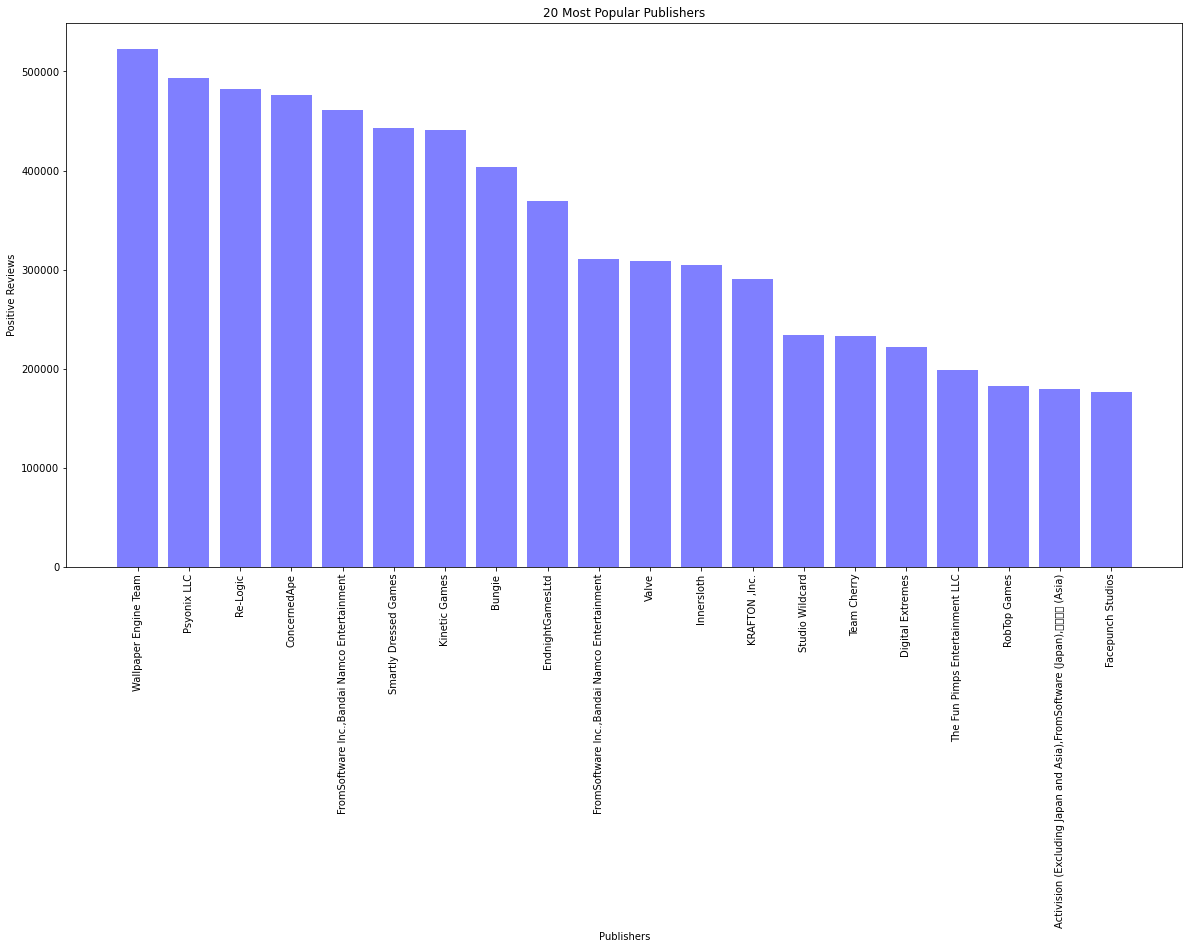

In [65]:
publishers = [522889.000000,493188.000000,482802.000000,475785.000000,460812.000000,443320.000000,
              441220.000000,403109.000000,368986.000000,310407.000000,308132.416667,304372.000000,
              290881.250000,233839.500000,232778.000000,221747.500000,198204.000000,182534.000000,
              179498.000000,176224.750000]
publishers_x_axis = np.arange(len(publishers))
publishers_tick_locations = [value for value in publishers_x_axis]
plt.figure(figsize=(20,10))
plt.bar(publishers_x_axis, publishers, color='blue', alpha=0.5, align="center")
plt.xticks(publishers_tick_locations, ["Wallpaper Engine Team","Psyonix LLC","Re-Logic","ConcernedApe",
                                       "FromSoftware Inc.,Bandai Namco Entertainment","Smartly Dressed Games",
                                       "Kinetic Games","Bungie","EndnightGamesLtd",
                                       "FromSoftware Inc.,Bandai Namco Entertainment","Valve","Innersloth","KRAFTON ,Inc.",
                                       "Studio Wildcard","Team Cherry","Digital Extremes",
                                       "The Fun Pimps Entertainment LLC","RobTop Games",
                                       "Activision (Excluding Japan and Asia),FromSoftware (Japan),方块游戏 (Asia)",
                                       "Facepunch Studios"], rotation = "vertical")
plt.title("20 Most Popular Publishers")
plt.xlabel("Publishers")
plt.ylabel("Positive Reviews")
plt.show()

In [66]:
estimated_df = game_df.sort_values(by=["Estimated owners"], ascending=False)
grouped_data = estimated_df.groupby("Estimated owners")
grouped_data.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Publishers,Categories,Genres,Tags,Screenshots,Movies,Estimated Owners,year,month,day
46158,730,Counter-Strike: Global Offensive,2012-08-21,50000000 - 100000000,825215,0,0.00,1,Counter-Strike: Global Offensive (CS: GO) expa...,"['Czech', 'Danish', 'Dutch', 'English', 'Finni...",...,Valve,"Multi-player,Steam Achievements,Full controlle...","Action,Free to Play","FPS,Shooter,Multiplayer,Competitive,Action,Tea...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/8...,75000000.0,2012,8,21
7030,1063730,New World,2021-09-28,50000000 - 100000000,16688,0,39.99,0,"Explore a thrilling, open-world MMO filled wit...","['English', 'French', 'Italian', 'German', 'Sp...",...,Amazon Games,"Multi-player,MMO,PvP,Online PvP,Co-op,Online C...","Action,Adventure,Massively Multiplayer,RPG","Massively Multiplayer,Open World,MMORPG,RPG,Ad...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,75000000.0,2021,9,28
30583,440,Team Fortress 2,2007-10-10,50000000 - 100000000,107702,0,0.00,1,The most fun you can have online - PC Gamer Is...,"['English', 'Danish', 'Dutch', 'Finnish', 'Fre...",...,Valve,"Multi-player,Cross-Platform Multiplayer,Steam ...","Action,Free to Play","Free to Play,Hero Shooter,Multiplayer,FPS,Shoo...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,75000000.0,2007,10,10
8885,578080,PUBG: BATTLEGROUNDS,2017-12-21,50000000 - 100000000,275374,0,0.00,0,"LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...","['English', 'Korean', 'Simplified Chinese', 'F...",...,"KRAFTON, Inc.","Multi-player,PvP,Online PvP,Stats,Remote Play ...","Action,Adventure,Free to Play,Massively Multip...","Survival,Shooter,Multiplayer,Battle Royale,FPS...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,75000000.0,2017,12,21
12007,239140,Dying Light,2015-01-26,5000000 - 10000000,5110,17,29.99,34,From the creators of hit titles Dead Island an...,"['English', 'French', 'Italian', 'German', 'Sp...",...,Techland,"Single-player,Multi-player,PvP,Online PvP,Co-o...","Action,RPG","Zombies,Survival Horror,Horror,Online Co-Op,Op...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,7500000.0,2015,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70868,2328930,Ultimechs Spectator,2023-03-16,0 - 0,0,0,0.00,0,Streamers and sports fans alike can now view U...,['English'],...,Resolution Games,NaN,Video Production,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0.0,2023,3,16
5655,1823050,Determina Playtest,2021-11-19,0 - 0,0,0,0.00,0,NaN,[],...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2021,11,19
71150,2313190,Asura Online Never Ending Playtest,2023-03-20,0 - 0,0,0,0.00,0,NaN,[],...,NaN,NaN,NaN,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,0.0,2023,3,20
5918,944750,Forgotten Souls,2021-11-19,0 - 0,0,0,0.00,0,Forgotten Souls is a turn-based strategy game ...,['English'],...,10101 Software,"Multi-player,PvP,Shared/Split Screen PvP,Share...","Free to Play,Indie",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0.0,2021,11,19


In [67]:
estimated_df[["Name","Estimated owners","Developers","Publishers"]]

,Name,Estimated owners,Developers,Publishers
46158,Counter-Strike: Global Offensive,50000000 - 100000000,"Valve,Hidden Path Entertainment",Valve
7030,New World,50000000 - 100000000,Amazon Games,Amazon Games
30583,Team Fortress 2,50000000 - 100000000,Valve,Valve
8885,PUBG: BATTLEGROUNDS,50000000 - 100000000,"KRAFTON, Inc.","KRAFTON, Inc."
12007,Dying Light,5000000 - 10000000,Techland,Techland
...,...,...,...,...
66776,Wild Growth TD Playtest,0 - 0,NaN,NaN
66956,Quarterstaff Playtest,0 - 0,NaN,NaN
56189,Frostbitten,0 - 0,White Valley Studios,White Valley Studios
15407,Sky Fleet Playtest,0 - 0,NaN,NaN


In [68]:
# Convert the "Estimated owners" column to numeric type, convert non-numeric values to NaN
estimated_df["Estimated owners"] = pd.to_numeric(estimated_df["Estimated owners"], errors="coerce")

# Calculate the mean of "Estimated owners" for each genre
genre_estimated_df = estimated_df.groupby("Genres")["Estimated owners"].mean()

# Display the resulting DataFrame
genre_estimated_df.head()

Genres
Accounting                                                                                                                                                                    NaN
Accounting,Animation & Modeling,Audio Production,Design & Illustration,Education,Photo Editing,Software Training,Utilities,Video Production,Web Publishing                    NaN
Accounting,Animation & Modeling,Audio Production,Design & Illustration,Education,Photo Editing,Software Training,Utilities,Video Production,Web Publishing,Game Development   NaN
Accounting,Design & Illustration,Education,Utilities,Web Publishing,Game Development                                                                                          NaN
Accounting,Education,Software Training,Utilities,Early Access                                                                                                                 NaN
Name: Estimated owners, dtype: float64

In [69]:
# Group the data by "Developers" and calculate the mean of "Estimated owners" for each developer
developers_estimated_df = estimated_df.groupby("Developers")["Estimated owners"].mean()

# Sort the data in descending order of mean "Estimated owners" for each developer
developers_estimated_df = developers_estimated_df.sort_values(ascending=False)

developers_estimated_df

Developers
!CyberApex (SkagoGames)            NaN
#12                                NaN
#NVJOB                             NaN
#workshop                          NaN
'Kill On Sight' Game development   NaN
                                    ..
（Hong Kong）GKD                     NaN
（Hong Kong）GKD Game Studio         NaN
＼上／                                NaN
𝕲𝖗𝖆𝖓𝖉𝕸𝖎𝖓𝖎 𝕾𝖙𝖚𝖉𝖎𝖔𝖘 (ᚴᛘᛋ)            NaN
📚瓜山书坊Guashan Bookshop              NaN
Name: Estimated owners, Length: 44207, dtype: float64

In [70]:
owner_prices_df = top_scores_df.groupby(["Estimated owners"])["Price"].mean().sort_values(ascending=False)

# Display the resulting DataFrame
print(owner_prices_df.head(25))

Estimated owners
2000000 - 5000000        21.005357
5000000 - 10000000       20.607308
1000000 - 2000000        19.152300
500000 - 1000000         17.240446
200000 - 500000          15.526131
100000 - 200000          13.609074
50000 - 100000           13.514932
10000000 - 20000000      13.367917
50000000 - 100000000     13.330000
0 - 20000                13.254480
20000 - 50000            13.147241
20000000 - 50000000      11.161667
0 - 0                     7.652857
100000000 - 200000000     0.000000
Name: Price, dtype: float64


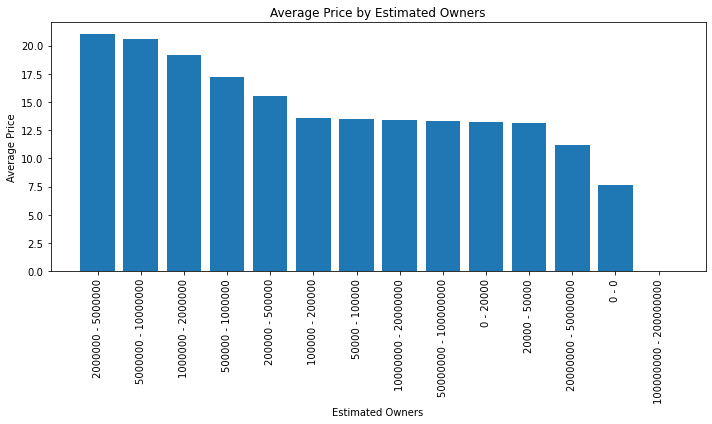

In [71]:
# Calculate the average price by "Estimated owners" and sort the DataFrame in descending order
owner_prices_df = top_scores_df.groupby(["Estimated owners"])["Price"].mean().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(owner_prices_df.index, owner_prices_df.values)
plt.xlabel("Estimated Owners")
plt.ylabel("Average Price")
plt.title("Average Price by Estimated Owners")
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

In [72]:
top_scores_df = game_df.sort_values(by="Metacritic score", ascending=False)
top_scores_df = top_scores_df[(top_scores_df["Metacritic score"])>0]
top_scores_df[["Name","Metacritic score","Positive","Negative"]]

,Name,Metacritic score,Positive,Negative
64935,Persona 5 Royal,97,3588,102
45752,Disco Elysium - The Final Cut,97,55250,3244
49557,Half-Life,96,73346,2619
57205,Grand Theft Auto V,96,1171197,210154
32406,BioShock™,96,26231,1546
...,...,...,...,...
30992,Rogue Warrior,29,782,388
11029,Fray: Reloaded Edition,27,1,49
31022,Postal III,24,1063,1749
5410,Flatout 3: Chaos & Destruction,23,506,2647


In [73]:
#metascore by estimated owner
owner_scores_df = top_scores_df.groupby(["Estimated owners"])\
["Average playtime forever","Metacritic score"].mean().sort_values(by="Average playtime forever",ascending=False)
owner_scores_df.head(25)

<ipython-input-73-1fb404db565c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  owner_scores_df = top_scores_df.groupby(["Estimated owners"])\


,Average playtime forever,Metacritic score
Estimated owners,,
100000000 - 200000000,37162.000000,90.000000
50000000 - 100000000,15944.000000,81.666667
20000000 - 50000000,7517.500000,83.500000
10000000 - 20000000,4403.291667,82.000000
5000000 - 10000000,3350.615385,80.634615
2000000 - 5000000,1940.668367,81.530612
1000000 - 2000000,1199.519164,78.456446
500000 - 1000000,823.601050,76.448819
200000 - 500000,526.330733,73.900156


In [74]:
owner_scores_df = owner_scores_df.rename(index={'100000000 - 200000000': '100M - 200M',\
                                                '50000000 - 100000000': '50M - 100M',\
                                                '20000000 - 50000000': '20M - 50M', \
                                                '10000000 - 20000000': '10M - 20M',\
                                               '5000000 - 10000000': '5M - 10M',\
                                               '2000000 - 5000000': '2M - 5M',\
                                               '1000000 - 2000000': '1M - 2M',\
                                               '500000 - 1000000': '500K - 1M',\
                                               '200000 - 500000': '200K - 500K',\
                                               '100000 - 200000': '100K - 200K',\
                                               '50000 - 100000': '50K - 100K',\
                                               '20000 - 50000': '20K - 50K',\
                                               '0 - 20000': '0 - 20K'})

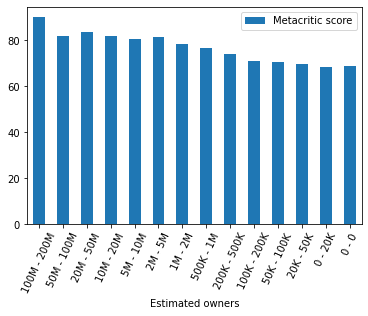

In [75]:
owner_scores_df.plot(kind='bar',y="Metacritic score")
plt.xticks(rotation=65)
plt.show()

In [77]:
# Group the data by both "Categories" and "Genres" and calculate the sum of "Estimated owners" for each combination
category_genre_estimated_df = estimated_df.groupby(["Categories", "Genres"])["Estimated owners"].sum()

# Sort the data in descending order based on the sum of "Estimated owners"
sorted_category_genre_estimated_df = category_genre_estimated_df.sort_values(ascending=False)

# Get the top 10 categories and genres with the most estimated owners
top_10_category_genre_estimated_df = sorted_category_genre_estimated_df.head(10)

# Convert the resulting Series to a DataFrame and reset the index for better readability
top_10_category_genre_df = top_10_category_genre_estimated_df.reset_index()

# Display the DataFrame with the top 10 categories and genres
print(top_10_category_genre_df)

                         Categories  \
0                Captions available   
1  Single-player,Steam Achievements   
2  Single-player,Steam Achievements   
3  Single-player,Steam Achievements   
4  Single-player,Steam Achievements   
5  Single-player,Steam Achievements   
6  Single-player,Steam Achievements   
7  Single-player,Steam Achievements   
8  Single-player,Steam Achievements   
9  Single-player,Steam Achievements   

                                              Genres  Estimated owners  
0  Audio Production,Education,Software Training,V...               0.0  
1  Action,Adventure,Casual,Indie,Racing,Early Access               0.0  
2  Action,Adventure,Casual,RPG,Simulation,Sports,...               0.0  
3                        Action,Adventure,Casual,RPG               0.0  
4  Action,Adventure,Casual,Indie,Strategy,Early A...               0.0  
5             Action,Adventure,Casual,Indie,Strategy               0.0  
6               Action,Adventure,Casual,Indie,Sports       

In [48]:
# HIGHEST RATED VIDEO GAMES OF ALL TIME 
# THE HIGHEST PLAYED VIDEO GAMES 


# df = pd.read_csv((file_path), usecols=['Name','Release date','Reviews','Average playtime forever','Developers','Publishers','Genres','Tags'])

df = pd.read_csv('../Group-6/games.csv', usecols=['Name','Average playtime forever'])

df_sorted_Rating = df.sort_values(by='Average playtime forever', ascending=False)




df_sorted_Rating.head(20)

,Name,Average playtime forever
10228,Boom 3D,145727
19303,Energy Engine PC Live Wallpaper,104238
36483,副作用之瞳-Tlicolity Eyes-,90351
23309,Defense Clicker,76068
39591,Relive,68357
57947,Sisyphus Reborn,68159
46203,YoloMouse,64973
27911,WARRIORS ALL-STARS,51388
7529,拯救大魔王2 Rescue the Great Demon 2,49555
60423,Combat Mission Shock Force 2,47336


In [49]:
# HIGHEST RATED VIDEO GAMES OF ALL TIME 
# DEVElOPERS THAT BUILD THE VIDEO GAMES


df = pd.read_csv(('../Group-6/games.csv'), usecols=['Name','Developers'])

df_sorted_Rating = df.sort_values(by='Developers', ascending=False)


df_sorted_Rating.head(20)

,Name,Developers
44684,A Winter Story -- Original Edition and Highly ...,📚瓜山书坊Guashan Bookshop
39996,飞跃跳台：冒险！！！ / 1000 Stages : Adventure!!!,📚瓜山书坊Guashan Bookshop
27454,Great Battles of Carolus XII,𝕲𝖗𝖆𝖓𝖉𝕸𝖎𝖓𝖎 𝕾𝖙𝖚𝖉𝖎𝖔𝖘 (ᚴᛘᛋ)
17572,Throwing Stone,＼上／
3210,Notes of Soul,（Hong Kong）GKD Game Studio
19514,Spirit Detective,（Hong Kong）GKD
22948,그랑 엠파이어,유진게임즈
62701,럭키 스태미나,유진게임즈
68678,메스가키 영애님!,유진게임즈
37905,그 어느 여름날의 이야기,유진게임즈


In [50]:
# HIGHEST RATED VIDEO GAMES OF ALL TIME 
# DEVElOPERS THAT BUILD THE VIDEO GAMES
# DEVElOPERS THAT BUILD THE MOST FAMOUS GAMES CONSISTENTALY


df = pd.read_csv(('../Group-6/games.csv'), usecols=['Name','Average playtime forever','Developers'])

df_sorted_Rating = df.sort_values(by='Average playtime forever', ascending=False)

name_counts1 = df_sorted_Rating['Developers'].value_counts()


name_counts1.head(20)

Choice of Games                     148
Creobit                             136
Laush Dmitriy Sergeevich            135
Boogygames Studios                  106
Sokpop Collective                   100
Atomic Fabrik,Cristian Manolachi     99
KOEI TECMO GAMES CO., LTD.           99
Hosted Games                         96
Reforged Group                       96
Elephant Games                       82
EroticGamesClub                      78
Blender Games                        71
Dnovel                               69
Somer Games                          69
SEGA                                 67
Ripknot Systems                      62
Cyber Keks                           61
RewindApp                            61
AMAX Interactive                     60
William at Oxford                    59
Name: Developers, dtype: int64

In [51]:
# HIGHEST RATED VIDEO GAMES OF ALL TIME 
# GENRES OF GAMES 

df = pd.read_csv(('../Group-6/games.csv'), usecols=['Name','Genres'])

df_sorted_Rating = df.sort_values(by='Genres', ascending=False)


df_sorted_Rating.head(20)

,Name,Genres
34921,Visual Novel Maker,Web Publishing
4067,Web Designer 15 Premium Steam Edition,Web Publishing
4021,RPG Maker 2000,Web Publishing
23872,Web Designer 12 Premium Steam Edition,Web Publishing
56436,RPG Maker VX,Web Publishing
11139,RPG Maker XP,Web Publishing
58583,Bush Hockey League,"Violent,Sports"
53361,Ultimate War,"Violent,Simulation,Early Access"
40347,AngeliaLost,"Violent,RPG,Strategy"
30418,Pathfinder Adventures,"Violent,RPG,Strategy"


In [52]:
# HIGHEST RATED VIDEO GAMES OF ALL TIME 
# GENRES OF GAMES 
# THE MOST COMMNLY PLAYED GENRES OF THE MOST PLAYED VIDEO GAMES 


# ['Name','Release date','Reviews','Average playtime forever','Developers','Publishers','Genres','Tags'])

df = pd.read_csv(('../Group-6/games.csv'), usecols=['Name','Genres','Average playtime forever'])

df_sorted_Rating = df.sort_values(by='Average playtime forever', ascending=False)

name_counts = df_sorted_Rating['Genres'].value_counts()

name_counts.head(20)

Casual,Indie                     4294
Action,Indie                     4018
Action,Adventure,Indie           3280
Adventure,Indie                  2805
Adventure,Casual,Indie           2280
Action,Casual,Indie              2278
Indie                            2257
Casual                           2123
Action                           2023
Adventure                        1351
Casual,Indie,Strategy            1280
Action,Adventure,Casual,Indie    1240
Adventure,Casual                 1131
Casual,Indie,Simulation          1086
Action,Adventure                 1015
Adventure,Indie,RPG              1008
Action,Adventure,Indie,RPG        923
Strategy                          900
Simulation                        802
Indie,Strategy                    728
Name: Genres, dtype: int64

In [55]:
video_games = game_df[['AppID', 'Name', 'Release date', "Estimated Owners",
        'Price', 'Metacritic score', 'Average playtime forever', 'Average playtime two weeks', 'Developers', 'Publishers','Genres']]
video_games.head()

,AppID,Name,Release date,Estimated Owners,Price,Metacritic score,Average playtime forever,Average playtime two weeks,Developers,Publishers,Genres
36165,282010,Carmageddon Max Pack,1997-06-30,150000.0,9.99,0,39,0,Stainless Games Ltd,THQ Nordic,"Action,Indie,Racing"
22217,232770,POSTAL,1997-11-14,7500000.0,0.00,56,215,0,Running With Scissors,Running With Scissors,"Action,Indie"
49557,70,Half-Life,1998-11-08,7500000.0,9.99,96,459,102,Valve,Valve,Action
19555,20,Team Fortress Classic,1999-04-01,7500000.0,4.99,0,143,0,Valve,Valve,Action
17218,224920,Legacy of Kain: Soul Reaver,1999-09-08,750000.0,0.00,0,267,0,Crystal Dynamics,Square Enix,"Action,Adventure"


In [56]:
most_downloaded = video_games.groupby('Name').agg({"Estimated Owners": "sum"})
most_downloaded.sort_values('Estimated Owners', ascending=False).head(10)

,Estimated Owners
Name,
Dota 2,150000000.0
Team Fortress 2,75000000.0
PUBG: BATTLEGROUNDS,75000000.0
Counter-Strike: Global Offensive,75000000.0
New World,75000000.0
Tom Clancy's Rainbow Six® Siege,35040000.0
Warframe,35000000.0
Wallpaper Engine,35000000.0
Unturned,35000000.0


In [57]:
most_expensive = video_games.sort_values('Price', ascending=False)
most_expensive = most_expensive[['Name', 'Price']]
most_expensive.head(10)

,Name,Price
26936,Ascent Free-Roaming VR Experience,999.00
57689,Aartform Curvy 3D 3.0,299.90
32110,Houdini Indie,269.99
12150,VEGAS 19 Edit - Steam Edition,249.00
58208,COVID-19 Epidemic Prevention,199.99
2038,Earthquake escape,199.99
70301,Underground roof fall hazard assessment VR Tra...,199.99
13167,来自女巫森林的法师,199.99
10930,眼睛（眼球）结构研究,199.99
30875,fight,199.99


In [58]:
downloads_price = most_downloaded = video_games.groupby(['Name', 'Price']).agg({"Estimated Owners": "sum"})
downloads_price.sort_values('Estimated Owners', ascending=False).head(10)

,,Estimated Owners
Name,Price,
Dota 2,0.00,150000000.0
Team Fortress 2,0.00,75000000.0
New World,39.99,75000000.0
PUBG: BATTLEGROUNDS,0.00,75000000.0
Counter-Strike: Global Offensive,0.00,75000000.0
Tom Clancy's Rainbow Six® Siege,19.99,35040000.0
Among Us,3.99,35000000.0
Destiny 2,0.00,35000000.0
Grand Theft Auto V,0.00,35000000.0


In [59]:
video_games['Estimated Sales'] = video_games['Price'] * video_games['Estimated Owners']
video_games.head()

<ipython-input-59-3965989b5f61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  video_games['Estimated Sales'] = video_games['Price'] * video_games['Estimated Owners']


,AppID,Name,Release date,Estimated Owners,Price,Metacritic score,Average playtime forever,Average playtime two weeks,Developers,Publishers,Genres,Estimated Sales
36165,282010,Carmageddon Max Pack,1997-06-30,150000.0,9.99,0,39,0,Stainless Games Ltd,THQ Nordic,"Action,Indie,Racing",1498500.0
22217,232770,POSTAL,1997-11-14,7500000.0,0.00,56,215,0,Running With Scissors,Running With Scissors,"Action,Indie",0.0
49557,70,Half-Life,1998-11-08,7500000.0,9.99,96,459,102,Valve,Valve,Action,74925000.0
19555,20,Team Fortress Classic,1999-04-01,7500000.0,4.99,0,143,0,Valve,Valve,Action,37425000.0
17218,224920,Legacy of Kain: Soul Reaver,1999-09-08,750000.0,0.00,0,267,0,Crystal Dynamics,Square Enix,"Action,Adventure",0.0


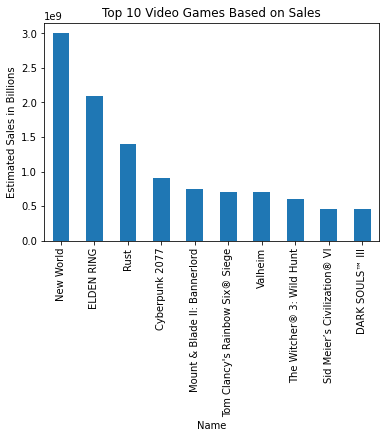

In [60]:
highest_sales = video_games.groupby('Name')['Estimated Sales'].sum().sort_values(ascending=False).head(10).plot.bar()
highest_sales.set_ylabel('Estimated Sales in Billions')
highest_sales.set_title("Top 10 Video Games Based on Sales")
plt.show()

In [61]:
def free_or_paid(x):
    if x == 0:
        return 'Free'
    else:
        return "Paid"

In [62]:
for index, row in video_games.iterrows():
    video_games.at[index, 'Free or Paid'] = free_or_paid(video_games.at[index, 'Price'])

C:\Users\gregw\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\gregw\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [63]:
video_games.head()

,AppID,Name,Release date,Estimated Owners,Price,Metacritic score,Average playtime forever,Average playtime two weeks,Developers,Publishers,Genres,Estimated Sales,Free or Paid
36165,282010,Carmageddon Max Pack,1997-06-30,150000.0,9.99,0,39,0,Stainless Games Ltd,THQ Nordic,"Action,Indie,Racing",1498500.0,Paid
22217,232770,POSTAL,1997-11-14,7500000.0,0.00,56,215,0,Running With Scissors,Running With Scissors,"Action,Indie",0.0,Free
49557,70,Half-Life,1998-11-08,7500000.0,9.99,96,459,102,Valve,Valve,Action,74925000.0,Paid
19555,20,Team Fortress Classic,1999-04-01,7500000.0,4.99,0,143,0,Valve,Valve,Action,37425000.0,Paid
17218,224920,Legacy of Kain: Soul Reaver,1999-09-08,750000.0,0.00,0,267,0,Crystal Dynamics,Square Enix,"Action,Adventure",0.0,Free


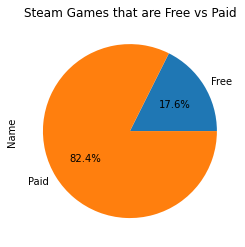

In [64]:
vg_fp = video_games.groupby('Free or Paid')['Name'].count().plot.pie(autopct="%1.1f%%")
vg_fp.set_title('Steam Games that are Free vs Paid')
plt.show()

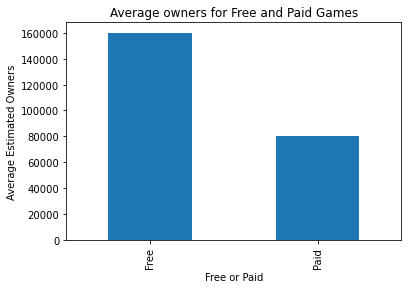

In [65]:
free_graph = video_games.groupby('Free or Paid')['Estimated Owners'].mean().plot.bar()
free_graph.set_ylabel('Average Estimated Owners')
free_graph.set_title('Average owners for Free and Paid Games')
plt.show()

In [66]:
oneshot_df = video_games['Genres'].str.split(",").str.join('|').str.get_dummies()
oneshot_df.head()

,360 Video,Accounting,Action,Adventure,Animation & Modeling,Audio Production,Casual,Design & Illustration,Documentary,Early Access,...,Short,Simulation,Software Training,Sports,Strategy,Tutorial,Utilities,Video Production,Violent,Web Publishing
36165,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22217,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49557,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19555,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17218,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
video_games_full = video_games.join(oneshot_df)
video_games_full.head()

,AppID,Name,Release date,Estimated Owners,Price,Metacritic score,Average playtime forever,Average playtime two weeks,Developers,Publishers,...,Short,Simulation,Software Training,Sports,Strategy,Tutorial,Utilities,Video Production,Violent,Web Publishing
36165,282010,Carmageddon Max Pack,1997-06-30,150000.0,9.99,0,39,0,Stainless Games Ltd,THQ Nordic,...,0,0,0,0,0,0,0,0,0,0
22217,232770,POSTAL,1997-11-14,7500000.0,0.00,56,215,0,Running With Scissors,Running With Scissors,...,0,0,0,0,0,0,0,0,0,0
49557,70,Half-Life,1998-11-08,7500000.0,9.99,96,459,102,Valve,Valve,...,0,0,0,0,0,0,0,0,0,0
19555,20,Team Fortress Classic,1999-04-01,7500000.0,4.99,0,143,0,Valve,Valve,...,0,0,0,0,0,0,0,0,0,0
17218,224920,Legacy of Kain: Soul Reaver,1999-09-08,750000.0,0.00,0,267,0,Crystal Dynamics,Square Enix,...,0,0,0,0,0,0,0,0,0,0


In [68]:
vg_pay = video_games_full.loc[(video_games_full["Price"] > 0)]
vg_pay.head()

,AppID,Name,Release date,Estimated Owners,Price,Metacritic score,Average playtime forever,Average playtime two weeks,Developers,Publishers,...,Short,Simulation,Software Training,Sports,Strategy,Tutorial,Utilities,Video Production,Violent,Web Publishing
36165,282010,Carmageddon Max Pack,1997-06-30,150000.0,9.99,0,39,0,Stainless Games Ltd,THQ Nordic,...,0,0,0,0,0,0,0,0,0,0
49557,70,Half-Life,1998-11-08,7500000.0,9.99,96,459,102,Valve,Valve,...,0,0,0,0,0,0,0,0,0,0
19555,20,Team Fortress Classic,1999-04-01,7500000.0,4.99,0,143,0,Valve,Valve,...,0,0,0,0,0,0,0,0,0,0
39055,50,Half-Life: Opposing Force,1999-11-01,7500000.0,4.99,0,214,0,Gearbox Software,Valve,...,0,0,0,0,0,0,0,0,0,0
34638,60,Ricochet,2000-11-01,7500000.0,4.99,0,3978,49,Valve,Valve,...,0,0,0,0,0,0,0,0,0,0


In [69]:
vg_pay.columns

Index(['AppID', 'Name', 'Release date', 'Estimated Owners', 'Price',
       'Metacritic score', 'Average playtime forever',
       'Average playtime two weeks', 'Developers', 'Publishers', 'Genres',
       'Estimated Sales', 'Free or Paid', '360 Video', 'Accounting', 'Action',
       'Adventure', 'Animation & Modeling', 'Audio Production', 'Casual',
       'Design & Illustration', 'Documentary', 'Early Access', 'Education',
       'Episodic', 'Free to Play', 'Game Development', 'Gore', 'Indie',
       'Massively Multiplayer', 'Movie', 'Nudity', 'Photo Editing', 'RPG',
       'Racing', 'Sexual Content', 'Short', 'Simulation', 'Software Training',
       'Sports', 'Strategy', 'Tutorial', 'Utilities', 'Video Production',
       'Violent', 'Web Publishing'],
      dtype='object')

In [70]:
Video = vg_pay.groupby('360 Video')['Estimated Sales'].sum()
Adventure = vg_pay.groupby('Adventure')['Estimated Sales'].sum()
Action = vg_pay.groupby('Action')['Estimated Sales'].sum()
Sports = vg_pay.groupby('Sports')['Estimated Sales'].sum()
Strategy = vg_pay.groupby('Strategy')['Estimated Sales'].sum()
RPG = vg_pay.groupby('RPG')['Estimated Sales'].sum()
Accounting = vg_pay.groupby('Accounting')['Estimated Sales'].sum()
Animation = vg_pay.groupby('Animation & Modeling')['Estimated Sales'].sum()
Audio = vg_pay.groupby('Audio Production')['Estimated Sales'].sum()
Casual = vg_pay.groupby('Casual')['Estimated Sales'].sum()
Documentary = vg_pay.groupby('Documentary')['Estimated Sales'].sum()
Design = vg_pay.groupby('Design & Illustration')['Estimated Sales'].sum()
Early_Access = vg_pay.groupby('Early Access')['Estimated Sales'].sum()
Education = vg_pay.groupby('Education')['Estimated Sales'].sum()
Episodic = vg_pay.groupby('Episodic')['Estimated Sales'].sum()
Game_Development = vg_pay.groupby('Game Development')['Estimated Sales'].sum()
Gore = vg_pay.groupby('Gore')['Estimated Sales'].sum()
Indie = vg_pay.groupby('Indie')['Estimated Sales'].sum()
Multi = vg_pay.groupby('Massively Multiplayer')['Estimated Sales'].sum()
Movie = vg_pay.groupby('Movie')['Estimated Sales'].sum()
Nudity = vg_pay.groupby('Nudity')['Estimated Sales'].sum()
Photo = vg_pay.groupby('Photo Editing')['Estimated Sales'].sum()
Racing = vg_pay.groupby('Racing')['Estimated Sales'].sum()
Content = vg_pay.groupby('Sexual Content')['Estimated Sales'].sum()
Short = vg_pay.groupby('Short')['Estimated Sales'].sum()
Simulation = vg_pay.groupby('Simulation')['Estimated Sales'].sum()
Training = vg_pay.groupby('Software Training')['Estimated Sales'].sum()
Tutorial = vg_pay.groupby('Tutorial')['Estimated Sales'].sum()
Utilities = vg_pay.groupby('Utilities')['Estimated Sales'].sum()
Production = vg_pay.groupby('Video Production')['Estimated Sales'].sum()
Violent = vg_pay.groupby('Violent')['Estimated Sales'].sum()
Web = vg_pay.groupby('Web Publishing')['Estimated Sales'].sum()

In [71]:
ratings = pd.DataFrame({"360 Video": Video, "Accounting": Accounting, "Adventure": Adventure, "Action": Action, 
                        "Animation": Animation, "Audio Production": Audio, "Casual": Casual,
                        "Design&Illustration": Design, "Documentary": Documentary, "Early Access": Early_Access, "Education": Education,
                        "Episodic": Episodic, "Game Development": Game_Development, "Gore": Gore, "Indie": Indie,
                        "Multiplayer": Multi, "Movie": Movie, "Nudity": Nudity, "Photo Editing": Photo,
                        "RPG":RPG, "Racing": Racing, "Sexual Content": Content, "Short": Short, "Simulation": Simulation, 
                        "Software": Training, "Sports": Sports, "Strategy": Strategy, "Tutorial": Tutorial,
                        "Utilities": Utilities, "Video Production": Production, "Violent": Violent, "Web Publishing": Web})
ratings

,360 Video,Accounting,Adventure,Action,Animation,Audio Production,Casual,Design&Illustration,Documentary,Early Access,...,Short,Simulation,Software,Sports,Strategy,Tutorial,Utilities,Video Production,Violent,Web Publishing
0,8.763952e+10,8.763448e+10,5.268776e+10,3.075350e+10,8.735797e+10,8.751135e+10,7.983177e+10,8.732254e+10,8.763952e+10,8.114645e+10,...,8.763952e+10,7.034201e+10,8.758215e+10,8.482825e+10,6.897549e+10,8.763952e+10,8.729937e+10,8.751110e+10,8.757400e+10,8.756812e+10
1,9.900000e+03,5.047300e+06,3.495177e+10,5.688603e+10,2.815554e+08,1.281758e+08,7.807758e+09,3.169882e+08,9.900000e+03,6.493080e+09,...,9.900000e+03,1.729752e+10,5.738075e+07,2.811276e+09,1.866404e+10,9.900000e+03,3.401648e+08,1.284262e+08,6.552585e+07,7.141010e+07


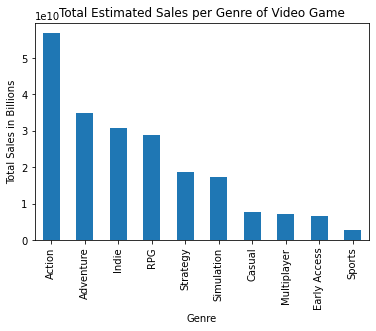

In [72]:
y_axis = ratings.iloc[1,:].sort_values(ascending=False).head(10).plot.bar()
y_axis.set_ylabel("Total Sales in Billions")
y_axis.set_xlabel("Genre")
y_axis.set_title("Total Estimated Sales per Genre of Video Game")
plt.show()

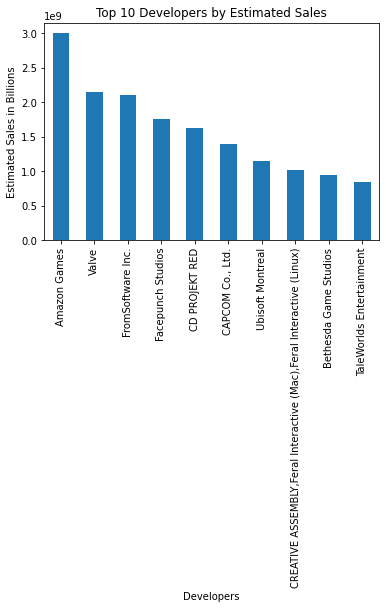

<Figure size 432x288 with 0 Axes>

In [73]:
vg_developers = vg_pay.groupby('Developers')['Estimated Sales'].sum()
dev_graph = vg_developers.sort_values(ascending=False).head(10).plot.bar()
dev_graph.set_ylabel("Estimated Sales in Billions")
dev_graph.set_title("Top 10 Developers by Estimated Sales")
plt.show()
plt.tight_layout()

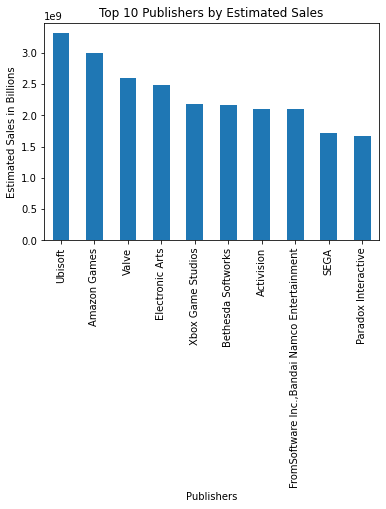

In [74]:
vg_publishers = vg_pay.groupby('Publishers')['Estimated Sales'].sum()
pub_graph = vg_publishers.sort_values(ascending=False).head(10).plot.bar()
pub_graph.set_ylabel("Estimated Sales in Billions")
pub_graph.set_title("Top 10 Publishers by Estimated Sales")
plt.show()

In [75]:
vg_free = video_games_full.loc[(video_games_full["Price"] == 0)]
vg_free

,AppID,Name,Release date,Estimated Owners,Price,Metacritic score,Average playtime forever,Average playtime two weeks,Developers,Publishers,...,Short,Simulation,Software Training,Sports,Strategy,Tutorial,Utilities,Video Production,Violent,Web Publishing
22217,232770,POSTAL,1997-11-14,7500000.0,0.0,56,215,0,Running With Scissors,Running With Scissors,...,0,0,0,0,0,0,0,0,0,0
17218,224920,Legacy of Kain: Soul Reaver,1999-09-08,750000.0,0.0,0,267,0,Crystal Dynamics,Square Enix,...,0,0,0,0,0,0,0,0,0,0
57194,340,Half-Life 2: Lost Coast,2005-10-27,35000000.0,0.0,0,37,0,Valve,Valve,...,0,0,0,0,0,0,0,0,0,0
61600,3400,Hammer Heads Deluxe,2006-08-30,35000.0,0.0,0,0,0,"PopCap Games, Inc.","PopCap Games, Inc.",...,0,0,0,0,0,0,0,0,0,0
40498,3810,BloodRayne (Legacy),2006-09-14,75000.0,0.0,65,127,0,Terminal Reality,Ziggurat,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74491,2464360,BallX Playtest,2023-06-11,0.0,0.0,0,0,0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
74619,2441610,Debug Quest,2023-06-12,0.0,0.0,0,0,0,AveoGames,AveoGames,...,0,0,0,0,1,0,0,0,0,0
63777,2146280,Death Corp,2023-11-01,0.0,0.0,0,0,0,Alberto Costa,A.C.,...,0,0,0,0,0,0,0,0,0,0
65533,2199410,Transcendence,2023-12-31,0.0,0.0,0,0,0,烧糊梦工厂,烧糊梦工厂,...,0,0,0,0,0,0,0,0,0,0


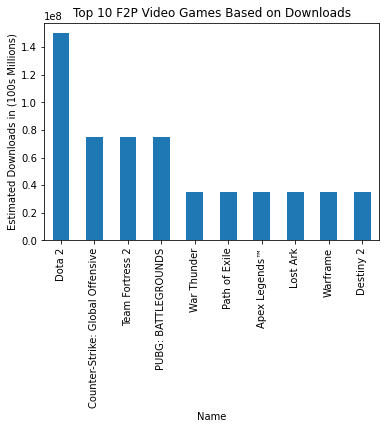

In [76]:
eo_free = vg_free.groupby('Name')['Estimated Owners'].sum()
free_eo = eo_free.sort_values(ascending=False).head(10).plot.bar()
free_eo.set_ylabel("Estimated Downloads in (100s Millions)")
free_eo.set_title("Top 10 F2P Video Games Based on Downloads")
plt.show()

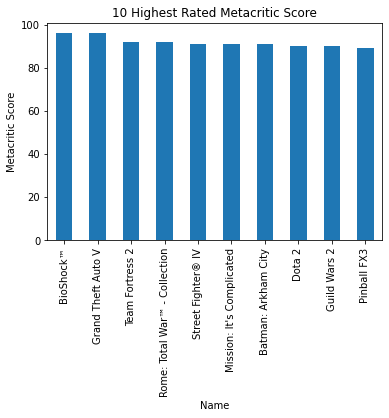

In [77]:
free_meta = video_games.loc[(video_games["Price"] == 0) & (video_games['Metacritic score'] > 0)]
free_meta_1 = free_meta.groupby('Name')['Metacritic score'].mean().sort_values(ascending=False).head(10).plot.bar()
free_meta_1.set_ylabel('Metacritic Score')
free_meta_1.set_title('10 Highest Rated Metacritic Score')
plt.show()

In [78]:
Video = vg_free.groupby('360 Video')['Estimated Owners'].sum()
Adventure = vg_free.groupby('Adventure')['Estimated Owners'].sum()
Action = vg_free.groupby('Action')['Estimated Owners'].sum()
Sports = vg_free.groupby('Sports')['Estimated Owners'].sum()
Strategy = vg_free.groupby('Strategy')['Estimated Owners'].sum()
RPG = vg_free.groupby('RPG')['Estimated Owners'].sum()
Accounting = vg_free.groupby('Accounting')['Estimated Owners'].sum()
Animation = vg_free.groupby('Animation & Modeling')['Estimated Owners'].sum()
Audio = vg_free.groupby('Audio Production')['Estimated Owners'].sum()
Casual = vg_free.groupby('Casual')['Estimated Owners'].sum()
Documentary = vg_free.groupby('Documentary')['Estimated Owners'].sum()
Design = vg_free.groupby('Design & Illustration')['Estimated Owners'].sum()
Early_Access = vg_free.groupby('Early Access')['Estimated Owners'].sum()
Education = vg_free.groupby('Education')['Estimated Owners'].sum()
Episodic = vg_free.groupby('Episodic')['Estimated Owners'].sum()
Game_Development = vg_free.groupby('Game Development')['Estimated Owners'].sum()
Gore = vg_free.groupby('Gore')['Estimated Owners'].sum()
Indie = vg_free.groupby('Indie')['Estimated Owners'].sum()
Multi = vg_free.groupby('Massively Multiplayer')['Estimated Owners'].sum()
Movie = vg_free.groupby('Movie')['Estimated Owners'].sum()
Nudity = vg_free.groupby('Nudity')['Estimated Owners'].sum()
Photo = vg_free.groupby('Photo Editing')['Estimated Owners'].sum()
Racing = vg_free.groupby('Racing')['Estimated Owners'].sum()
Content = vg_free.groupby('Sexual Content')['Estimated Owners'].sum()
Short = vg_free.groupby('Short')['Estimated Owners'].sum()
Simulation = vg_free.groupby('Simulation')['Estimated Owners'].sum()
Training = vg_free.groupby('Software Training')['Estimated Owners'].sum()
Tutorial = vg_free.groupby('Tutorial')['Estimated Owners'].sum()
Utilities = vg_free.groupby('Utilities')['Estimated Owners'].sum()
Production = vg_free.groupby('Video Production')['Estimated Owners'].sum()
Violent = vg_free.groupby('Violent')['Estimated Owners'].sum()
Web = vg_free.groupby('Web Publishing')['Estimated Owners'].sum()

In [79]:
ratings = pd.DataFrame({"360 Video": Video, "Accounting": Accounting, "Adventure": Adventure, "Action": Action, 
                        "Animation": Animation, "Audio Production": Audio, "Casual": Casual,
                        "Design&Illustration": Design, "Documentary": Documentary, "Early Access": Early_Access, "Education": Education,
                        "Episodic": Episodic, "Game Development": Game_Development, "Gore": Gore, "Indie": Indie,
                        "Multiplayer": Multi, "Movie": Movie, "Nudity": Nudity, "Photo Editing": Photo,
                        "RPG":RPG, "Racing": Racing, "Sexual Content": Content, "Short": Short, "Simulation": Simulation, 
                        "Software": Training, "Sports": Sports, "Strategy": Strategy, "Tutorial": Tutorial,
                        "Utilities": Utilities, "Video Production": Production, "Violent": Violent, "Web Publishing": Web})
ratings

,360 Video,Accounting,Adventure,Action,Animation,Audio Production,Casual,Design&Illustration,Documentary,Early Access,...,Short,Simulation,Software,Sports,Strategy,Tutorial,Utilities,Video Production,Violent,Web Publishing
0,2.107025e+09,2.106855e+09,1.440525e+09,5.182200e+08,2.097140e+09,2.105125e+09,1.749900e+09,2.099305e+09,2.107025e+09,1.999050e+09,...,2.107025e+09,1.826710e+09,2.104230e+09,1.988995e+09,1.696400e+09,2.107025e+09,2.094015e+09,2.097700e+09,2.102610e+09,2.105210e+09
1,NaN,1.700000e+05,6.665000e+08,1.588805e+09,9.885000e+06,1.900000e+06,3.571250e+08,7.720000e+06,NaN,1.079750e+08,...,NaN,2.803150e+08,2.795000e+06,1.180300e+08,4.106250e+08,NaN,1.301000e+07,9.325000e+06,4.415000e+06,1.815000e+06


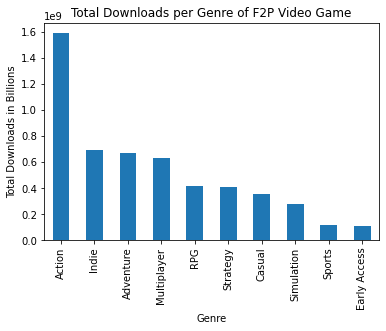

In [80]:
y_axis = ratings.iloc[1,:].sort_values(ascending=False).head(10).plot.bar()
y_axis.set_ylabel("Total Downloads in Billions")
y_axis.set_xlabel("Genre")
y_axis.set_title("Total Downloads per Genre of F2P Video Game")
plt.show()